In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir()

['AssignmentData.csv',
 'b',
 'basic.ipynb',
 'basic1.ipynb',
 'EDS-Assignment.pdf',
 'lstm.ipynb',
 'prediction.ipynb',
 'train1.csv',
 'val1.csv']

In [3]:
df=pd.read_csv('AssignmentData.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'datetime', 'load', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_speed', 'cloud_cover', 'date'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

datetime       load  apparent_temperature  temperature  \
0  2018-01-01 00:00:00  803.22270              10.45800     10.45800   
1  2018-01-01 00:15:00  774.89523              10.32675     10.32675   
2  2018-01-01 00:30:00  731.46927              10.19550     10.19550   
3  2018-01-01 00:45:00  713.93870              10.06425     10.06425   
4  2018-01-01 01:00:00  699.23007               9.93300      9.93300   

   humidity  dew_point  wind_speed  cloud_cover        date  
0  0.955500   8.946000         0.0          0.0  2018-01-01  
1  0.961625   8.911875         0.0          0.0  2018-01-01  
2  0.967750   8.877750         0.0          0.0  2018-01-01  
3  0.973875   8.843625         0.0          0.0  2018-01-01  
4  0.980000   8.809500         0.0          0.0  2018-01-01

In [7]:
df.datetime=pd.to_datetime(df.datetime)

In [8]:
df.drop('date',axis=1,inplace=True)

In [9]:
df

datetime       load  apparent_temperature  temperature  \
0      2018-01-01 00:00:00  803.22270             10.458000    10.458000   
1      2018-01-01 00:15:00  774.89523             10.326750    10.326750   
2      2018-01-01 00:30:00  731.46927             10.195500    10.195500   
3      2018-01-01 00:45:00  713.93870             10.064250    10.064250   
4      2018-01-01 01:00:00  699.23007              9.933000     9.933000   
...                    ...        ...                   ...          ...   
103579 2020-12-14 22:45:00        NaN             12.450375    12.450375   
103580 2020-12-14 23:00:00        NaN             12.285000    12.285000   
103581 2020-12-14 23:15:00        NaN             13.650000    13.650000   
103582 2020-12-14 23:30:00        NaN             13.650000    13.650000   
103583 2020-12-14 23:45:00        NaN             13.387500    13.387500   

        humidity  dew_point  wind_speed  cloud_cover  
0       0.955500   8.946000      0.0000       0.0000  
1       0.961625   8.911875      0.0000       0.0000  
2       0.967750   8.877750      0.0000       0.0000  
3       0.973875   8.843625      0.0000       0.0000  
4       0.980000   8.809500      0.0000       0.0000  
...          ...        ...         ...          ...  
103579  0.611625   4.087125      1.9110       0.0000  
103580  0.619500   4.084500      1.8795       0.0000  
103581  0.829500   8.589000      2.4675       0.8925  
103582  0.829500   8.610000      2.4150       0.8925  
103583  0.840000   8.662500      2.4150       0.8610  

[103584 rows x 8 columns]

In [10]:
# From the date column,it is understood that , we have 3 years data

In [11]:
df.isna().sum()

datetime                   0
load                    1632
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_speed                 0
cloud_cover                0
dtype: int64

In [12]:
# We observed that each data point differ by 15 minutes

# 4 * 24 is one day

In [13]:
4*24  # 97 rows make one day

96

In [14]:
1632/96 # So we dont have data for 17 days

17.0

In [15]:
df.iloc[:97,:] # So this makes a day of data 

datetime       load  apparent_temperature  temperature  \
0  2018-01-01 00:00:00  803.22270             10.458000    10.458000   
1  2018-01-01 00:15:00  774.89523             10.326750    10.326750   
2  2018-01-01 00:30:00  731.46927             10.195500    10.195500   
3  2018-01-01 00:45:00  713.93870             10.064250    10.064250   
4  2018-01-01 01:00:00  699.23007              9.933000     9.933000   
..                 ...        ...                   ...          ...   
92 2018-01-01 23:00:00  909.08383             11.448500    11.448500   
93 2018-01-01 23:15:00  877.21833             11.305875    11.305875   
94 2018-01-01 23:30:00  820.95527             11.163250    11.163250   
95 2018-01-01 23:45:00  780.91483             11.020625    11.020625   
96 2018-01-02 00:00:00  746.22537             10.878000    10.878000   

    humidity  dew_point  wind_speed  cloud_cover  
0   0.955500   8.946000    0.000000          0.0  
1   0.961625   8.911875    0.000000          0.0  
2   0.967750   8.877750    0.000000          0.0  
3   0.973875   8.843625    0.000000          0.0  
4   0.980000   8.809500    0.000000          0.0  
..       ...        ...         ...          ...  
92  1.022000  10.986500    0.483000          0.0  
93  1.029000  10.951500    0.543375          0.0  
94  1.036000  10.916500    0.603750          0.0  
95  1.043000  10.881500    0.664125          0.0  
96  1.050000  10.846500    0.724500          0.0  

[97 rows x 8 columns]

In [16]:
# Data Understanding

<AxesSubplot:xlabel='datetime'>

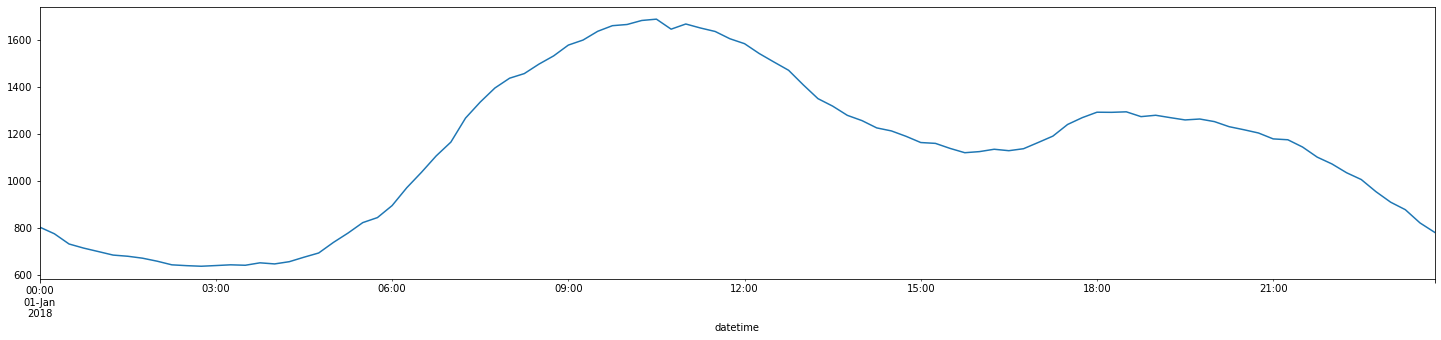

In [17]:
df.iloc[:96,:].set_index('datetime').load.plot(figsize=(25,5))  # Daily Plot

df.iloc[:96*7*5,:].rolling().

<AxesSubplot:xlabel='datetime'>

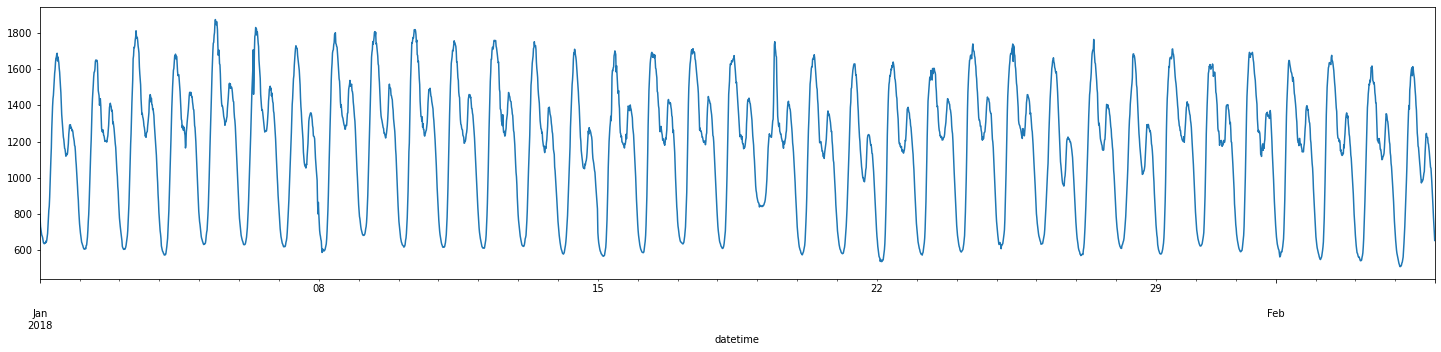

In [18]:
df.iloc[:96*7*5,:].set_index('datetime').load.plot(figsize=(25,5))  # Weekly Plot

<AxesSubplot:xlabel='datetime'>

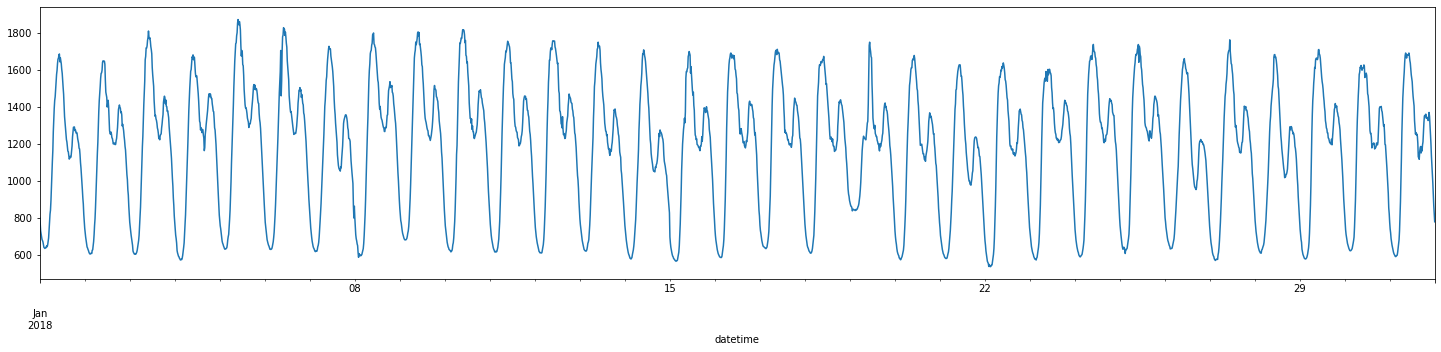

In [19]:
df.iloc[:96*31,:].set_index('datetime').load.plot(figsize=(25,5))  # Monthly plot

<AxesSubplot:xlabel='datetime'>

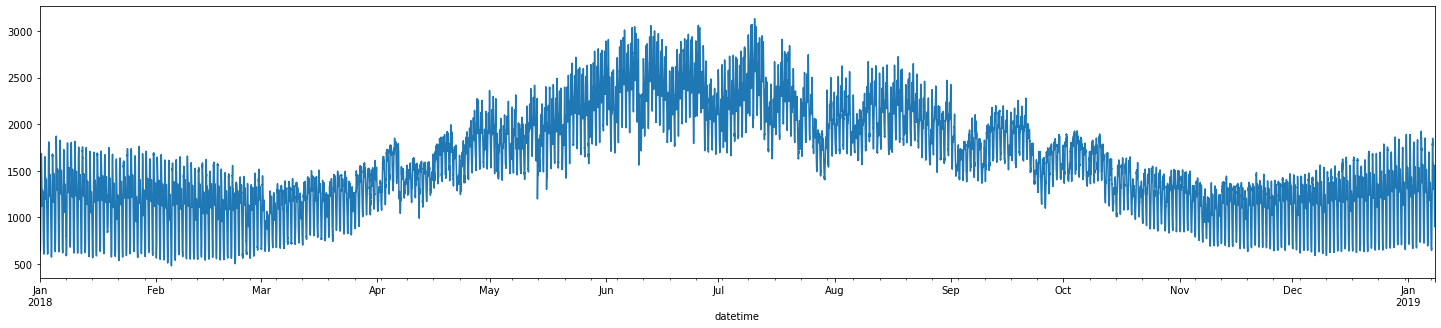

In [20]:
df.iloc[:96*31*12,:].set_index('datetime').load.plot(figsize=(25,5))  # Yearly plot

<AxesSubplot:xlabel='datetime'>

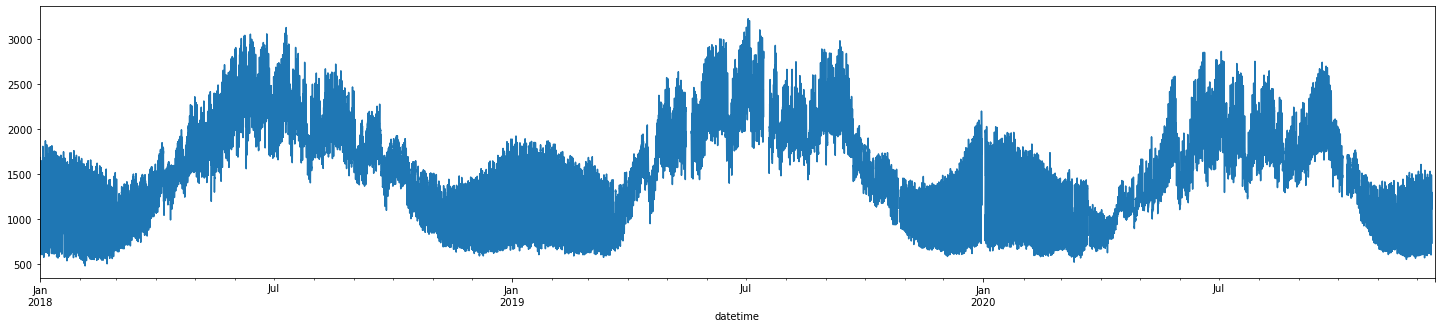

In [21]:
df.iloc[:96*31*12*3,:].set_index('datetime').load.plot(figsize=(25,5)) # 3 Yearly plot

In [22]:
k=df.iloc[:96*31*12*3,:].set_index('datetime').load

<AxesSubplot:xlabel='datetime'>

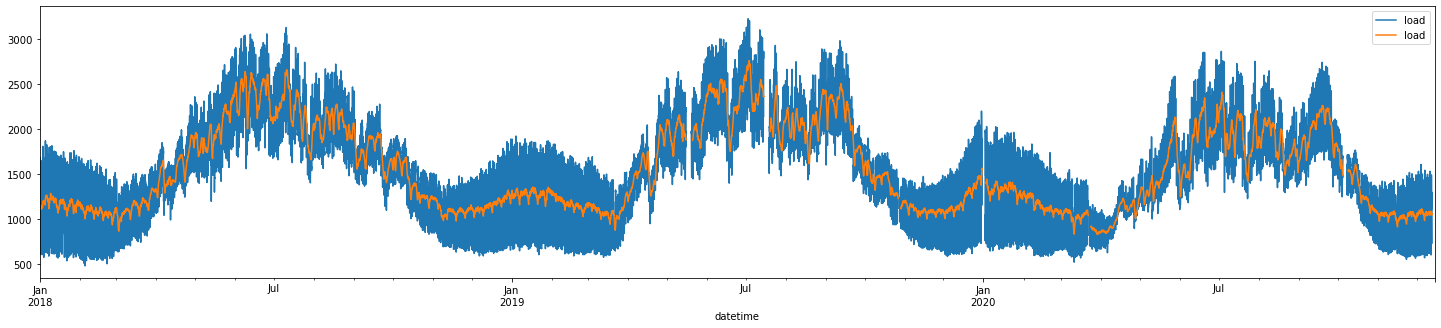

In [23]:
pd.concat([k,k.rolling(100).mean()],axis=1).plot(figsize=(25,5))

In [24]:
# From the above plots , we can infer that there is 
# seasonality at the day level,year level 
# trend at the month and year levels .

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
k=pd.DataFrame(scaler.fit_transform(df.drop('datetime',axis=1)),columns=df.columns[1:],index=df.datetime).rolling(96*2).median()

In [28]:
k1=df.drop('datetime',axis=1).rolling(96*2).median().set_index(df.datetime)

In [29]:
k1

load  apparent_temperature  temperature  humidity  \
datetime                                                                 
2018-01-01 00:00:00   NaN                   NaN          NaN       NaN   
2018-01-01 00:15:00   NaN                   NaN          NaN       NaN   
2018-01-01 00:30:00   NaN                   NaN          NaN       NaN   
2018-01-01 00:45:00   NaN                   NaN          NaN       NaN   
2018-01-01 01:00:00   NaN                   NaN          NaN       NaN   
...                   ...                   ...          ...       ...   
2020-12-14 22:45:00   NaN             15.655500    15.655500  0.610313   
2020-12-14 23:00:00   NaN             15.604313    15.592500  0.610313   
2020-12-14 23:15:00   NaN             15.559688    15.547875  0.610313   
2020-12-14 23:30:00   NaN             15.498000    15.498000  0.610313   
2020-12-14 23:45:00   NaN             15.453375    15.453375  0.610313   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2018-01-01 00:00:00        NaN         NaN          NaN  
2018-01-01 00:15:00        NaN         NaN          NaN  
2018-01-01 00:30:00        NaN         NaN          NaN  
2018-01-01 00:45:00        NaN         NaN          NaN  
2018-01-01 01:00:00        NaN         NaN          NaN  
...                        ...         ...          ...  
2020-12-14 22:45:00   5.687062       3.066     0.009188  
2020-12-14 23:00:00   5.664750       3.066     0.007875  
2020-12-14 23:15:00   5.664750       3.066     0.007875  
2020-12-14 23:30:00   5.664750       3.066     0.007875  
2020-12-14 23:45:00   5.664750       3.066     0.007875  

[103584 rows x 7 columns]

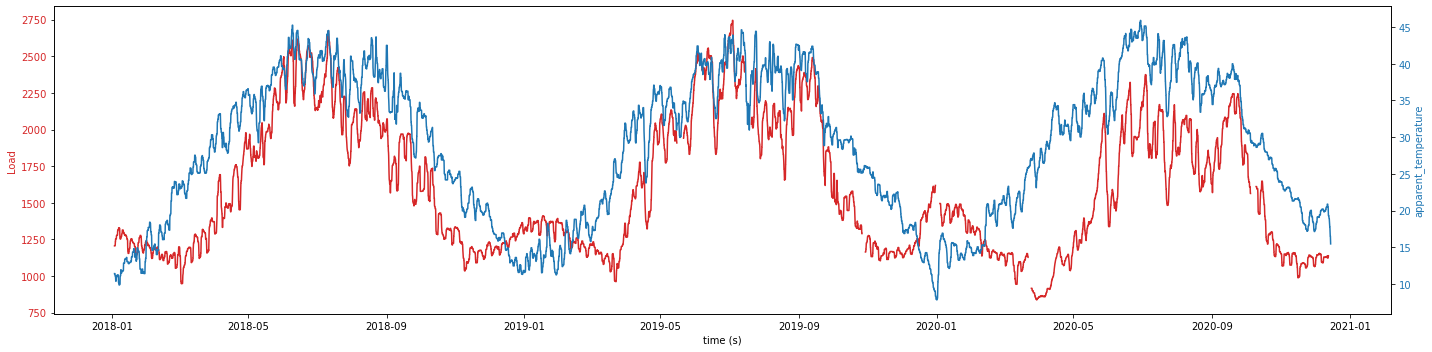

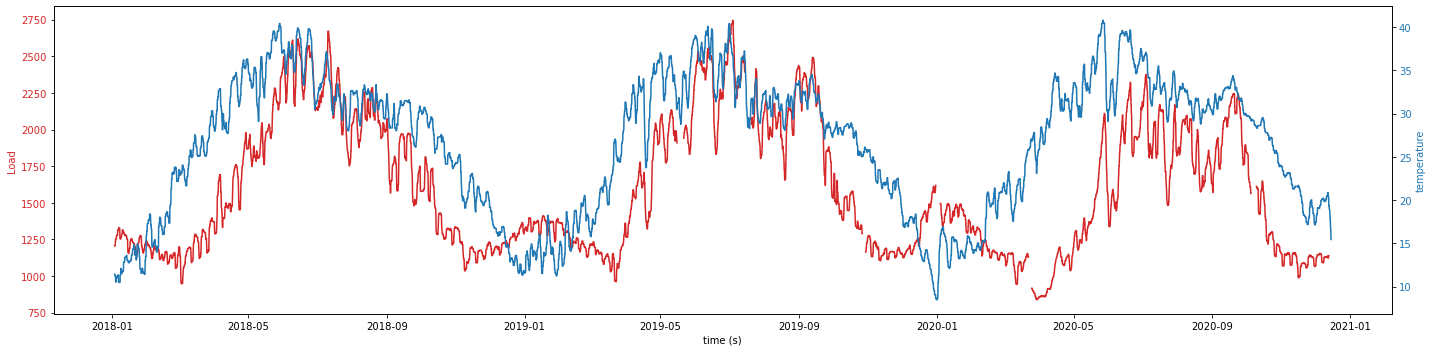

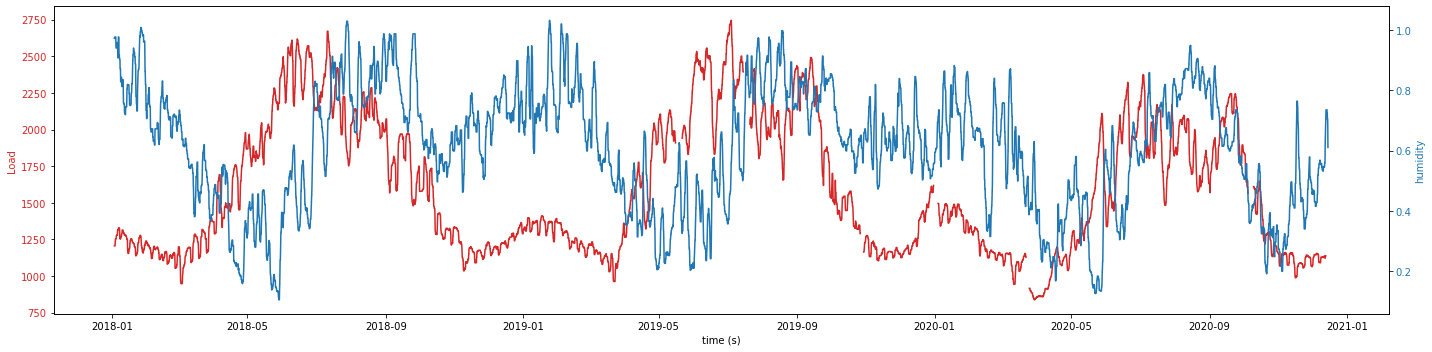

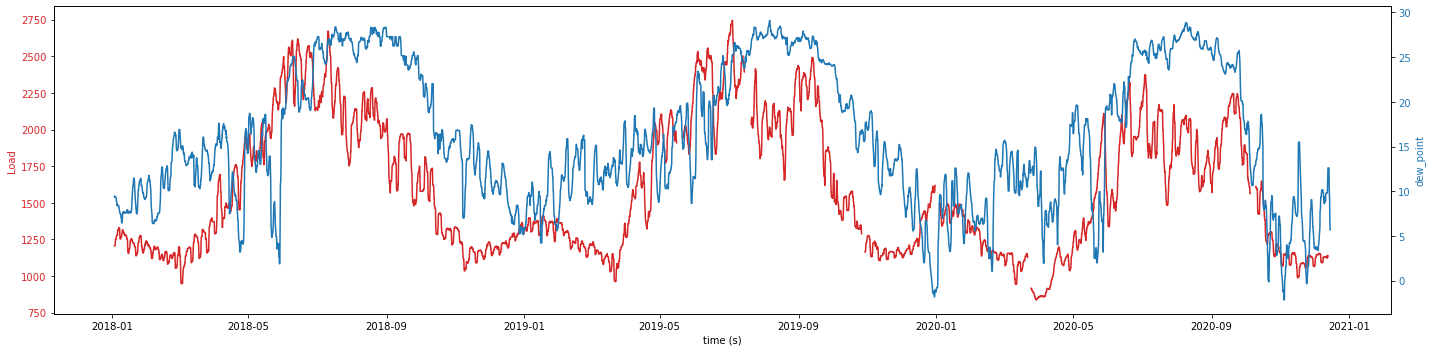

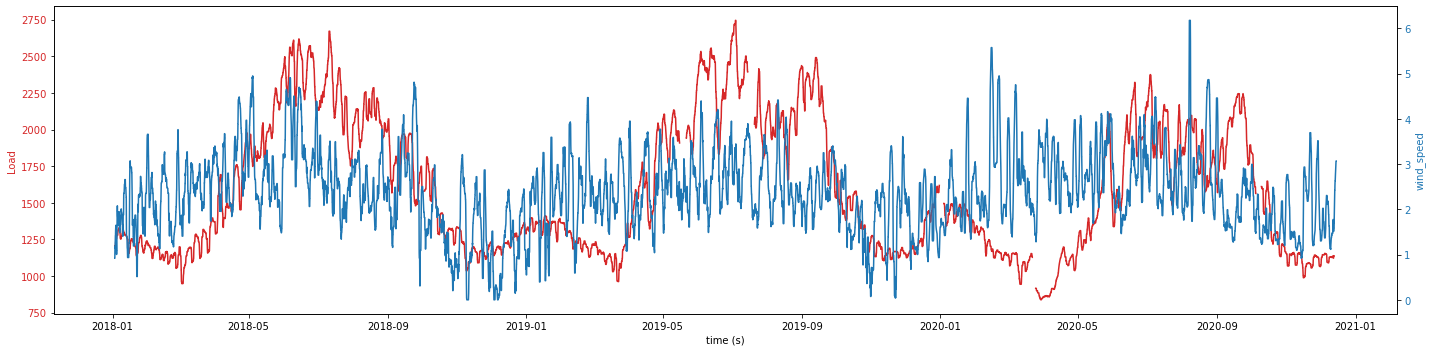

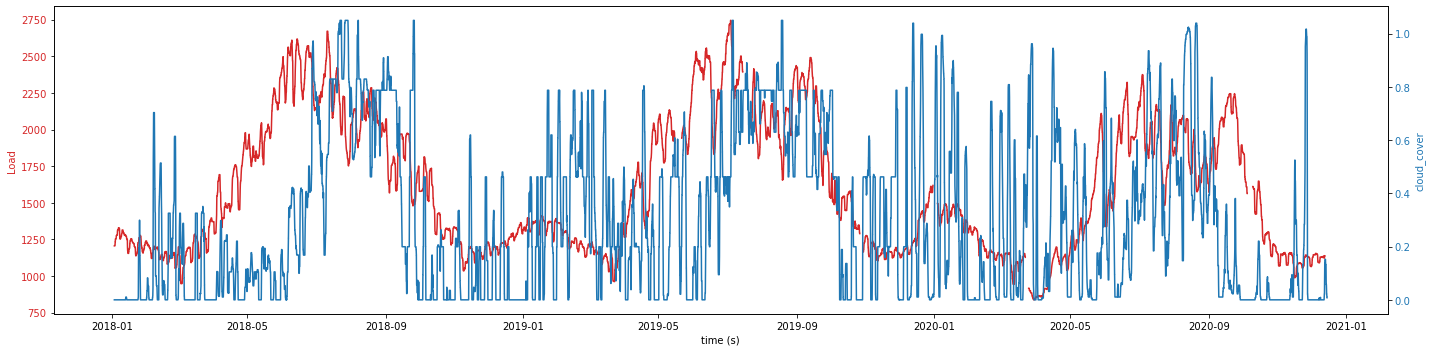

In [30]:
for i in df.columns[2:]:

    fig, ax1 = plt.subplots(figsize=(20,5))

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Load', color=color)
    ax1.plot(k1.index, k1.load, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel(i, color=color)  
    ax2.plot(k1.index, k1[i], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

In [31]:
# Plotting the scaled values to get a better picture of the relation ship with the load

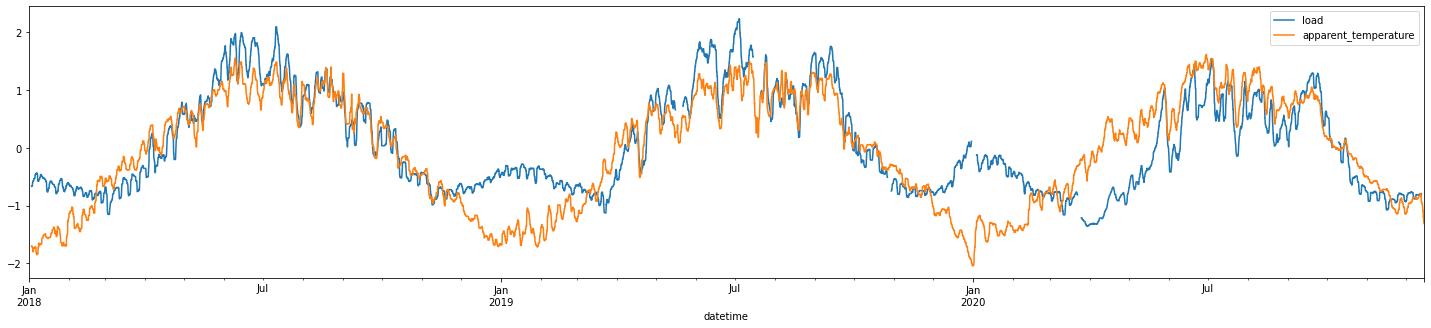

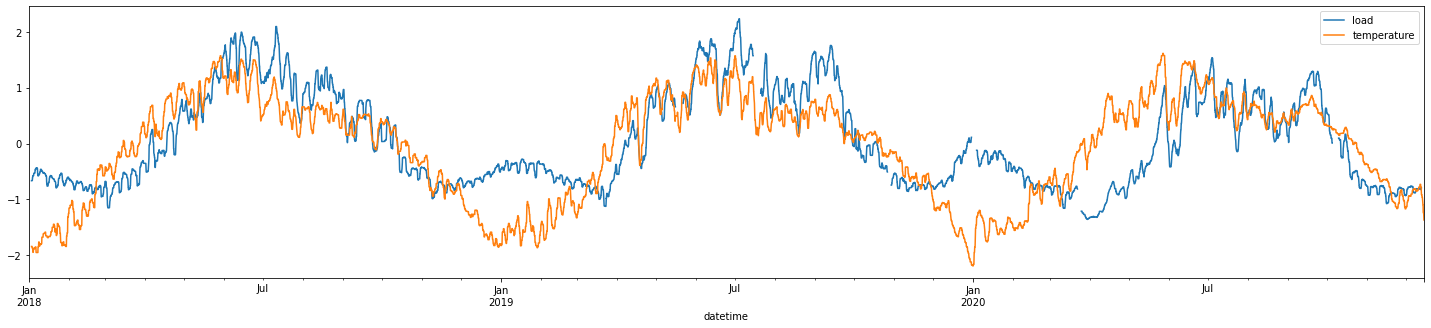

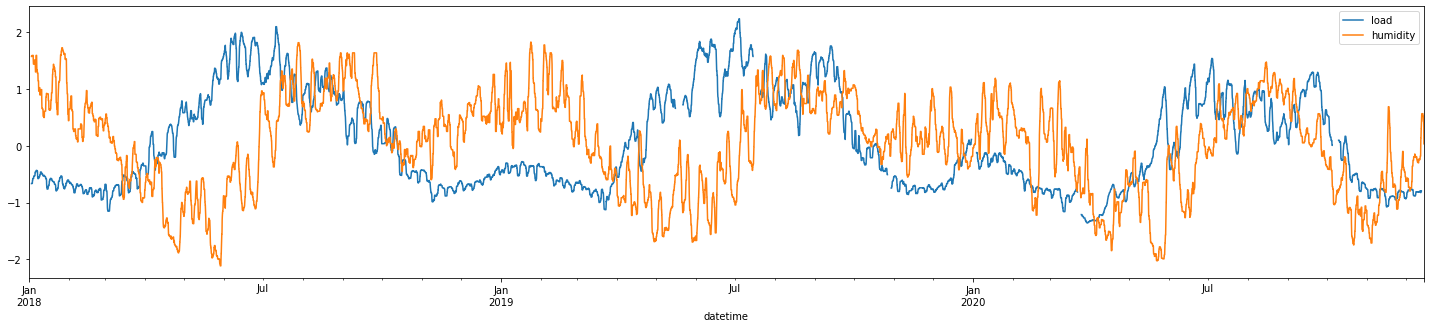

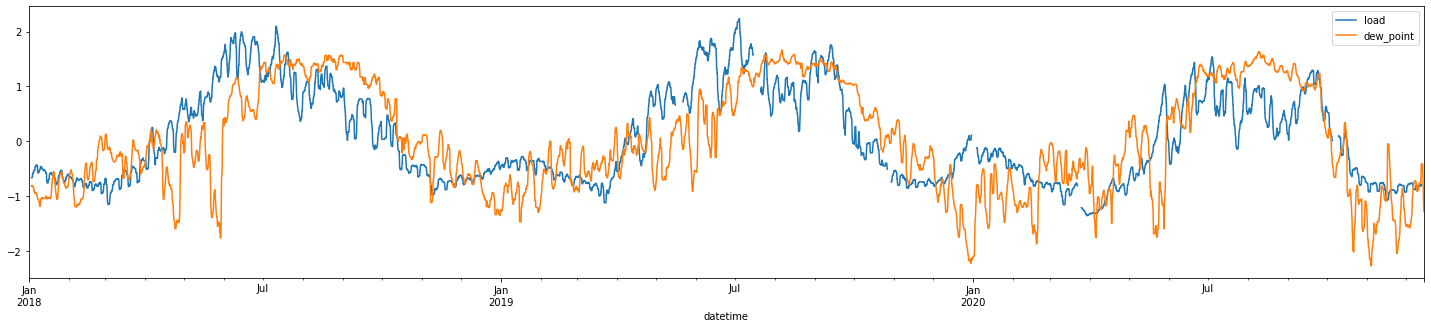

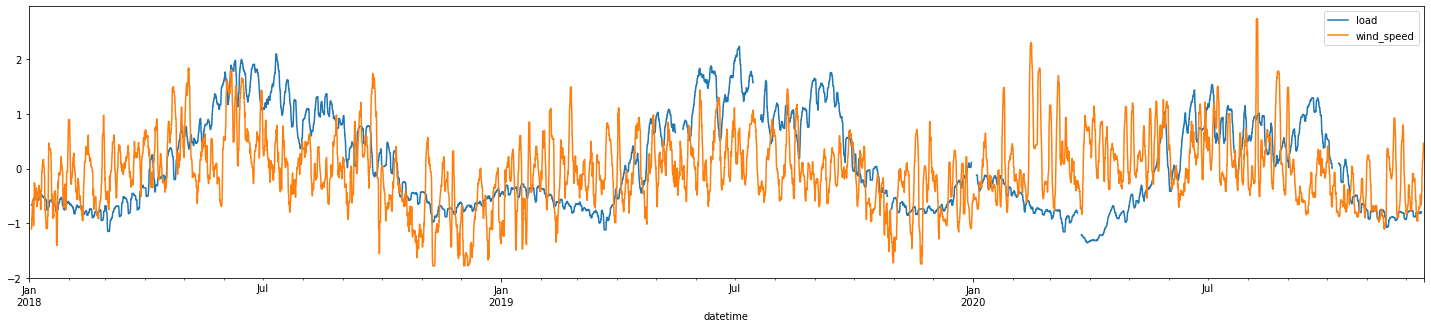

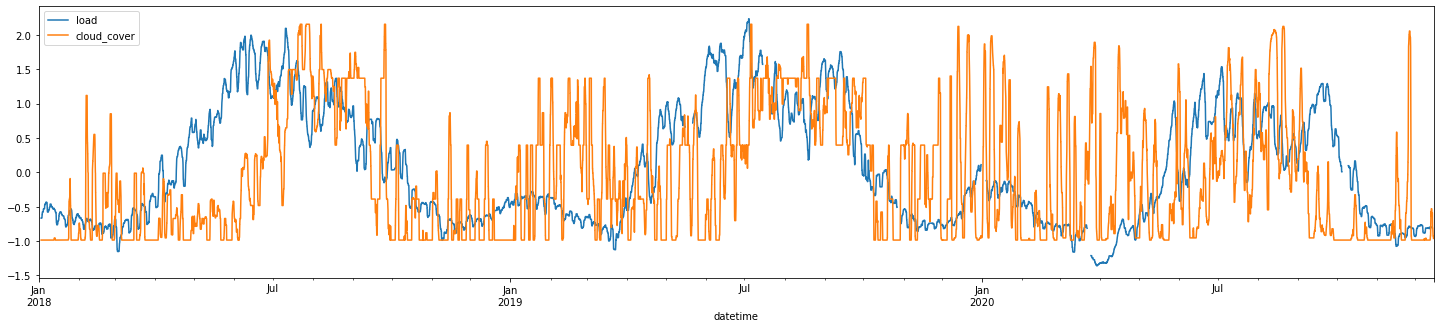

In [32]:
for i in range(1,len(df.columns)-1):
    k.iloc[:,[0,i]].plot(figsize=(25,5))

In [33]:
df

datetime       load  apparent_temperature  temperature  \
0      2018-01-01 00:00:00  803.22270             10.458000    10.458000   
1      2018-01-01 00:15:00  774.89523             10.326750    10.326750   
2      2018-01-01 00:30:00  731.46927             10.195500    10.195500   
3      2018-01-01 00:45:00  713.93870             10.064250    10.064250   
4      2018-01-01 01:00:00  699.23007              9.933000     9.933000   
...                    ...        ...                   ...          ...   
103579 2020-12-14 22:45:00        NaN             12.450375    12.450375   
103580 2020-12-14 23:00:00        NaN             12.285000    12.285000   
103581 2020-12-14 23:15:00        NaN             13.650000    13.650000   
103582 2020-12-14 23:30:00        NaN             13.650000    13.650000   
103583 2020-12-14 23:45:00        NaN             13.387500    13.387500   

        humidity  dew_point  wind_speed  cloud_cover  
0       0.955500   8.946000      0.0000       0.0000  
1       0.961625   8.911875      0.0000       0.0000  
2       0.967750   8.877750      0.0000       0.0000  
3       0.973875   8.843625      0.0000       0.0000  
4       0.980000   8.809500      0.0000       0.0000  
...          ...        ...         ...          ...  
103579  0.611625   4.087125      1.9110       0.0000  
103580  0.619500   4.084500      1.8795       0.0000  
103581  0.829500   8.589000      2.4675       0.8925  
103582  0.829500   8.610000      2.4150       0.8925  
103583  0.840000   8.662500      2.4150       0.8610  

[103584 rows x 8 columns]

In [34]:
# We can n't do the statistical modelling effectively using Holt's Winter as the trend is not linear.
# We can de-trend and consider the Holt's Winter as the base model to compare our results later with the advanced models
# But before building a models , lets check the inconsitency of the data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103584 entries, 0 to 103583
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   datetime              103584 non-null  datetime64[ns]
 1   load                  101952 non-null  float64       
 2   apparent_temperature  103584 non-null  float64       
 3   temperature           103584 non-null  float64       
 4   humidity              103584 non-null  float64       
 5   dew_point             103584 non-null  float64       
 6   wind_speed            103584 non-null  float64       
 7   cloud_cover           103584 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.3 MB


In [36]:
df.describe()

load  apparent_temperature    temperature       humidity  \
count  101952.000000         103584.000000  103584.000000  103584.000000   
mean     1558.964330             29.084052      27.080153       0.602338   
std       531.116557             10.411410       8.496460       0.235395   
min       480.631730              2.173500       3.685500       0.042000   
25%      1184.992600             20.590500      20.559000       0.420000   
50%      1496.820000             29.922375      28.621688       0.609000   
75%      1935.745800             37.458750      33.348000       0.798000   
max      3230.848600             56.731500      47.943000       1.050000   

           dew_point     wind_speed    cloud_cover  
count  103584.000000  103584.000000  103584.000000  
mean       15.890729       2.431892       0.329437  
std         7.938254       1.365737       0.334519  
min       -13.692000       0.000000       0.000000  
25%         9.783375       1.477875       0.000000  
50%        14.899500       2.352000       0.215250  
75%        23.887500       3.286500       0.582750  
max        31.059000      10.321500       1.050000

In [37]:
# We can see there are no negative values in the load data
# But there are nan values in the data set as already checked previously

In [38]:
# We need to understand , where nan values are there and for how many days we have the continous nan values. 
# For in between nan values , we can do the local forecast and can fill the nan values.

In [39]:
df.load.notnull().astype(int).cumsum().value_counts()[:10]/96   # We have continous nan values for a max of four days.

53376     4.010417
48000     4.010417
95616     3.010417
101952    2.010417
69120     2.010417
62976     1.010417
76800     1.010417
67966     0.010417
67973     0.010417
67972     0.010417
Name: load, dtype: float64

In [40]:
df_na=df.loc[df.load.isna(),:].set_index('datetime').load.isnull().astype(int).groupby(df.set_index('datetime').load.notnull().astype(int).cumsum()).cumsum().to_frame('consec_count_na')

In [41]:
(df_na//96).head(10)

consec_count_na
datetime                            
2019-05-16 00:00:00                0
2019-05-16 00:15:00                0
2019-05-16 00:30:00                0
2019-05-16 00:45:00                0
2019-05-16 01:00:00                0
2019-05-16 01:15:00                0
2019-05-16 01:30:00                0
2019-05-16 01:45:00                0
2019-05-16 02:00:00                0
2019-05-16 02:15:00                0

<AxesSubplot:xlabel='datetime', ylabel='consec_count_na'>

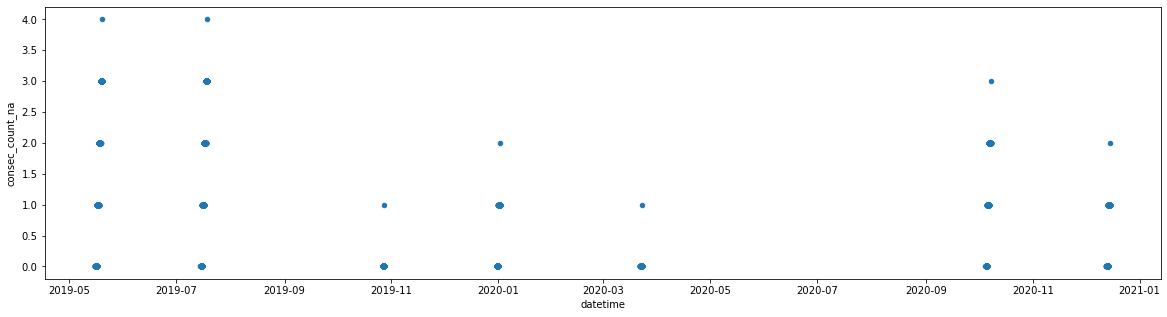

In [42]:
(df_na//96).reset_index().plot(x='datetime',y='consec_count_na',kind='scatter',figsize=(20,5)) # Null day plot

In [43]:
# We observed concescutive null values for 4 days, 4 days ,1 day, 2 days, 1 day, 3 days, 2 days respectively total of 17 days approximately.

In [44]:
# Null_day Conversion

def null_day(x):
    if x==0:
        return 0
    elif x<=96 and x>=1:
        return 1
    elif x>96 and x<=192:
        return 2
    elif x>192 and x<=288:
        return 3
    else :
        return 4

In [45]:
null_day_count=df.load.isnull().astype(int).groupby(df.load.notnull().astype(int).cumsum()).cumsum().to_frame('consec_count')['consec_count'].apply(lambda x: null_day(x))

In [46]:
null_day_df=pd.concat([
        pd.DataFrame(df.datetime),
        pd.DataFrame(df.load),
        null_day_count,  
    ],
    axis=1
)

In [47]:
null_day_df[null_day_df.load.isna()].iloc[:96*4,:] # First Four day Nan Analysis

datetime  load  consec_count
48000 2019-05-16 00:00:00   NaN             1
48001 2019-05-16 00:15:00   NaN             1
48002 2019-05-16 00:30:00   NaN             1
48003 2019-05-16 00:45:00   NaN             1
48004 2019-05-16 01:00:00   NaN             1
...                   ...   ...           ...
48379 2019-05-19 22:45:00   NaN             4
48380 2019-05-19 23:00:00   NaN             4
48381 2019-05-19 23:15:00   NaN             4
48382 2019-05-19 23:30:00   NaN             4
48383 2019-05-19 23:45:00   NaN             4

[384 rows x 3 columns]

In [48]:
# Creating a subset of the given data for train and validation to perform and check the analysis results 
# Left over data will be the test data set

In [49]:
train1=df.iloc[:48000-96*4,:]
train1.head()

datetime       load  apparent_temperature  temperature  humidity  \
0 2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
1 2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2 2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
3 2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
4 2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

   dew_point  wind_speed  cloud_cover  
0   8.946000         0.0          0.0  
1   8.911875         0.0          0.0  
2   8.877750         0.0          0.0  
3   8.843625         0.0          0.0  
4   8.809500         0.0          0.0

In [50]:
val1=df.iloc[48000-96*4:48000,:]
val1

datetime       load  apparent_temperature  temperature  \
47616 2019-05-12 00:00:00  2493.7102             34.083000    34.083000   
47617 2019-05-12 00:15:00  2468.3289             33.733875    33.733875   
47618 2019-05-12 00:30:00  2443.0284             33.384750    33.384750   
47619 2019-05-12 00:45:00  2414.4050             33.035625    33.035625   
47620 2019-05-12 01:00:00  2382.2062             32.686500    32.686500   
...                   ...        ...                   ...          ...   
47995 2019-05-15 22:45:00  2214.4654             31.576125    31.150875   
47996 2019-05-15 23:00:00  2241.2708             31.311000    30.901500   
47997 2019-05-15 23:15:00  2223.7675             25.462500    25.462500   
47998 2019-05-15 23:30:00  2232.2717             26.250000    26.250000   
47999 2019-05-15 23:45:00  2209.9305             27.825000    27.562500   

       humidity  dew_point  wind_speed  cloud_cover  
47616   0.31500    13.0200    2.110500     0.462000  
47617   0.32025    12.9885    2.044875     0.462000  
47618   0.32550    12.9570    1.979250     0.462000  
47619   0.33075    12.9255    1.913625     0.462000  
47620   0.33600    12.8940    1.848000     0.462000  
...         ...        ...         ...          ...  
47995   0.48825    17.7765    0.574875     0.454125  
47996   0.49350    17.7135    0.367500     0.451500  
47997   0.70350    19.4565    2.299500     0.651000  
47998   0.68250    18.9525    2.436000     0.630000  
47999   0.64050    18.4590    2.572500     0.567000  

[384 rows x 8 columns]

In [51]:
test1=df.iloc[48000:48000+96*4,:]
test1

datetime  load  apparent_temperature  temperature  humidity  \
48000 2019-05-16 00:00:00   NaN             31.458000    31.458000  0.441000   
48001 2019-05-16 00:15:00   NaN             31.371375    31.371375  0.443625   
48002 2019-05-16 00:30:00   NaN             31.284750    31.284750  0.446250   
48003 2019-05-16 00:45:00   NaN             31.198125    31.198125  0.448875   
48004 2019-05-16 01:00:00   NaN             31.111500    31.111500  0.451500   
...                   ...   ...                   ...          ...       ...   
48379 2019-05-19 22:45:00   NaN             34.568625    34.568625  0.328125   
48380 2019-05-19 23:00:00   NaN             34.356000    34.356000  0.336000   
48381 2019-05-19 23:15:00   NaN             31.762500    30.796500  0.399000   
48382 2019-05-19 23:30:00   NaN             31.500000    30.607500  0.399000   
48383 2019-05-19 23:45:00   NaN             31.500000    30.429000  0.399000   

       dew_point  wind_speed  cloud_cover  
48000  16.569000      0.1365       0.4620  
48001  16.553250      0.1680       0.4620  
48002  16.537500      0.1995       0.4620  
48003  16.521750      0.2310       0.4620  
48004  16.506000      0.2625       0.4620  
...          ...         ...          ...  
48379  14.303625      0.3360       0.0000  
48380  14.490000      0.0945       0.0000  
48381  14.700000      2.1630       0.1995  
48382  14.700000      2.1630       0.2205  
48383  14.700000      2.1630       0.2310  

[384 rows x 8 columns]

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

In [53]:
# We can n't do the statistical modelling effectively using Holt's Winter as the trend is not linear.
# We can de-trend the model and consider the Holt's Winter as the base model to compare our results later with the advanced models
# We will try dividing the whole period into sections to make sure the trend is linear and then build Holt's winter models for each section.
# But we will do this at last.

In [54]:
train1['load_diff']=train1.load.diff()

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
train1

datetime        load  apparent_temperature  temperature  \
0     2018-01-01 00:00:00   803.22270              10.45800     10.45800   
1     2018-01-01 00:15:00   774.89523              10.32675     10.32675   
2     2018-01-01 00:30:00   731.46927              10.19550     10.19550   
3     2018-01-01 00:45:00   713.93870              10.06425     10.06425   
4     2018-01-01 01:00:00   699.23007               9.93300      9.93300   
...                   ...         ...                   ...          ...   
47611 2019-05-11 22:45:00  2470.99530              35.60025     35.60025   
47612 2019-05-11 23:00:00  2511.80940              35.39550     35.39550   
47613 2019-05-11 23:15:00  2530.58530              34.65000     34.65000   
47614 2019-05-11 23:30:00  2545.59390              34.65000     34.65000   
47615 2019-05-11 23:45:00  2522.52550              34.12500     34.12500   

       humidity  dew_point  wind_speed  cloud_cover  load_diff  
0      0.955500   8.946000    0.000000       0.0000        NaN  
1      0.961625   8.911875    0.000000       0.0000  -28.32747  
2      0.967750   8.877750    0.000000       0.0000  -43.42596  
3      0.973875   8.843625    0.000000       0.0000  -17.53057  
4      0.980000   8.809500    0.000000       0.0000  -14.70863  
...         ...        ...         ...          ...        ...  
47611  0.278250  12.355875    3.016125       0.4620   58.16590  
47612  0.283500  12.400500    3.076500       0.4620   40.81410  
47613  0.378000  14.437500    2.845500       0.3780   18.77590  
47614  0.378000  13.965000    2.971500       0.3780   15.00860  
47615  0.367500  13.492500    3.108000       0.3675  -23.06840  

[47616 rows x 9 columns]

In [56]:
#hwes=holt winter
hwes_diff = ExponentialSmoothing(train1.load_diff[1:], seasonal_periods=96 ,trend=None, seasonal="add",initialization_method='legacy-heuristic',
                            use_boxcox=False).fit()
# hwes_diff.summary()

In [57]:
hwes_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                load_diff   No. Observations:                47615
Model:             ExponentialSmoothing   SSE                       15623995.649
Optimized:                         True   AIC                         276049.472
Trend:                             None   BIC                         276909.021
Seasonal:                      Additive   AICC                        276049.897
Seasonal Periods:                    96   Date:                 Sun, 09 Jan 2022
Box-Cox:                          False   Time:                         09:36:48
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_seasonal            0.1421429                gamma                 True
initial_level                -26.431657                  l.0                 True
initial_seasons.0            -1.8958128                  s.0                 True
initial_seasons.1            -16.994303                  s.1                 True
initial_seasons.2             8.9010872                  s.2                 True
initial_seasons.3             11.723027                  s.3                 True
initial_seasons.4             11.577587                  s.4                 True
initial_seasons.5             21.432157                  s.5                 True
initial_seasons.6             18.270857                  s.6                 True
initial_seasons.7             13.611727                  s.7                 True
initial_seasons.8             10.988757                  s.8                 True
initial_seasons.9             22.950187                  s.9                 True
initial_seasons.10            23.909687                 s.10                 True
initial_seasons.11            29.374797                 s.11                 True
initial_seasons.12            29.562657                 s.12                 True
initial_seasons.13            24.538917                 s.13                 True
initial_seasons.14            36.771027                 s.14                 True
initial_seasons.15            21.797777                 s.15                 True
initial_seasons.16            35.943837                 s.16                 True
initial_seasons.17            45.473187                 s.17                 True
initial_seasons.18            44.346027                 s.18                 True
initial_seasons.19            71.218087                 s.19                 True
initial_seasons.20            66.394327                 s.20                 True
initial_seasons.21            70.682787                 s.21                 True
initial_seasons.22            47.775987                 s.22                 True
initial_seasons.23            77.500287                 s.23                 True
initial_seasons.24            102.37457                 s.24                 True
initial_seasons.25            91.899857                 s.25                 True
initial_seasons.26            95.980257                 s.26                 True
initial_seasons.27            85.041957                 s.27                 True
initial_seasons.28            128.59316                 s.28                 True
initial_seasons.29            94.414757                 s.29                 True
initial_seasons.30            86.253957                 s.30                 True
initial_seasons.31            68.043657                 s.31                 True
initial_seasons.32        

In [58]:
hwes = ExponentialSmoothing(train1.load, seasonal_periods=96 ,trend=None, seasonal="add",initialization_method='legacy-heuristic',
                            use_boxcox=False).fit()


C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [59]:
hwes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                     load   No. Observations:                47616
Model:             ExponentialSmoothing   SSE                       36761537.632
Optimized:                         True   AIC                         316796.620
Trend:                             None   BIC                         317656.171
Seasonal:                      Additive   AICC                        316797.045
Seasonal Periods:                    96   Date:                 Sun, 09 Jan 2022
Box-Cox:                          False   Time:                         09:36:49
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5910168                alpha                 True
smoothing_seasonal            0.4089832                gamma                 True
initial_level                 1517.2573                  l.0                 True
initial_seasons.0            -738.58418                  s.0                 True
initial_seasons.1            -748.60717                  s.1                 True
initial_seasons.2            -768.56032                  s.2                 True
initial_seasons.3            -774.78518                  s.3                 True
initial_seasons.4            -780.55692                  s.4                 True
initial_seasons.5            -784.21295                  s.5                 True
initial_seasons.6            -778.22976                  s.6                 True
initial_seasons.7            -772.17766                  s.7                 True
initial_seasons.8            -763.89360                  s.8                 True
initial_seasons.9            -760.38597                  s.9                 True
initial_seasons.10           -751.70034                 s.10                 True
initial_seasons.11           -741.40917                 s.11                 True
initial_seasons.12           -727.05265                 s.12                 True
initial_seasons.13           -711.43153                 s.13                 True
initial_seasons.14           -698.24998                 s.14                 True
initial_seasons.15           -677.14327                 s.15                 True
initial_seasons.16           -659.70409                 s.16                 True
initial_seasons.17           -642.33175                 s.17                 True
initial_seasons.18           -618.33724                 s.18                 True
initial_seasons.19           -598.26939                 s.19                 True
initial_seasons.20           -556.60549                 s.20                 True
initial_seasons.21           -509.32102                 s.21                 True
initial_seasons.22           -461.51667                 s.22                 True
initial_seasons.23           -419.06835                 s.23                 True
initial_seasons.24           -357.44772                 s.24                 True
initial_seasons.25           -279.88971                 s.25                 True
initial_seasons.26           -217.11334                 s.26                 True
initial_seasons.27           -148.42613                 s.27                 True
initial_seasons.28           -94.661133                 s.28                 True
initial_seasons.29            2.8704115                 s.29                 True
initial_seasons.30            76.021838                 s.30                 True
initial_seasons.31            137.67459                 s.31                 True
initial_seasons.32        

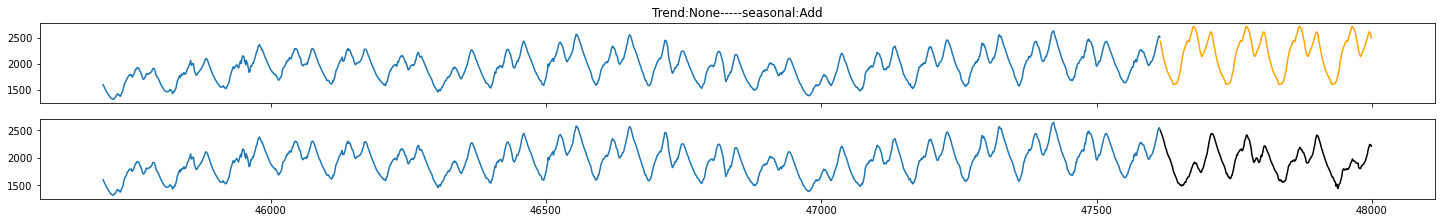

In [60]:
hwes1 = hwes.forecast(96*4)

plt.subplot(311)
plt.title('Trend:None-----seasonal:Add')
train1.iloc[-96*20:,:].load.plot(kind="line",figsize=(25,5))
hwes1.plot(kind="line",figsize=(25,5),color='orange',sharex=True)
plt.subplot(312)
train1.iloc[-96*20:,:].load.plot(kind="line",figsize=(25,5))
val1.load.plot(kind="line",figsize=(25,5),color='black',sharex=True)
plt.show()

In [61]:
# As the Trend is not linear, we are not able to give any trend parameter. So The model looks like its captured the seasonality to some extent.
# But it igoned the trend completely as we have not considered the trend.

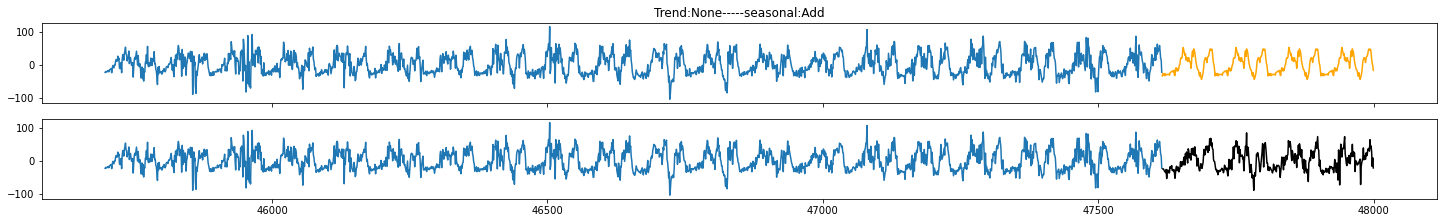

In [62]:
hwes1_diff = hwes_diff.forecast(96*4)

plt.subplot(311)
plt.title('Trend:None-----seasonal:Add')
train1.iloc[-96*20:,:].load.diff().plot(kind="line",figsize=(25,5))
hwes1_diff.plot(kind="line",figsize=(25,5),color='orange',sharex=True)
plt.subplot(312)
train1.iloc[-96*20:,:].load.diff().plot(kind="line",figsize=(25,5))
val1.load.diff().plot(kind="line",figsize=(25,5),color='black',sharex=True)
plt.show()

In [63]:
# After detrending the data , Holts winter seems to fit data slightly better compared to normal data.
# We will try to add a tred component manually and validate.
# So we need to predict the trend, which can be done seperately.

In [64]:
def rmse(y, t):
  return np.sqrt(np.mean((y - t)**2))

def mae(y, t):
  return np.mean(np.abs(y - t))

In [65]:
import statsmodels.tsa.seasonal as sts

In [66]:
# decomposition = sts.seasonal_decompose(train1.load,model='multiplicative', freq=96)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# train1.load.plot(kind="line",figsize=(15,6),label='Original')
# plt.subplot(412)
# trend.plot(kind="line",figsize=(15,6),label='trend')
# plt.legend(loc='best')
# plt.subplot(413)
# seasonal.plot(kind="line",figsize=(15,6),label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# residual.plot(kind="line",figsize=(15,6),label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

In [67]:
train1

datetime        load  apparent_temperature  temperature  \
0     2018-01-01 00:00:00   803.22270              10.45800     10.45800   
1     2018-01-01 00:15:00   774.89523              10.32675     10.32675   
2     2018-01-01 00:30:00   731.46927              10.19550     10.19550   
3     2018-01-01 00:45:00   713.93870              10.06425     10.06425   
4     2018-01-01 01:00:00   699.23007               9.93300      9.93300   
...                   ...         ...                   ...          ...   
47611 2019-05-11 22:45:00  2470.99530              35.60025     35.60025   
47612 2019-05-11 23:00:00  2511.80940              35.39550     35.39550   
47613 2019-05-11 23:15:00  2530.58530              34.65000     34.65000   
47614 2019-05-11 23:30:00  2545.59390              34.65000     34.65000   
47615 2019-05-11 23:45:00  2522.52550              34.12500     34.12500   

       humidity  dew_point  wind_speed  cloud_cover  load_diff  
0      0.955500   8.946000    0.000000       0.0000        NaN  
1      0.961625   8.911875    0.000000       0.0000  -28.32747  
2      0.967750   8.877750    0.000000       0.0000  -43.42596  
3      0.973875   8.843625    0.000000       0.0000  -17.53057  
4      0.980000   8.809500    0.000000       0.0000  -14.70863  
...         ...        ...         ...          ...        ...  
47611  0.278250  12.355875    3.016125       0.4620   58.16590  
47612  0.283500  12.400500    3.076500       0.4620   40.81410  
47613  0.378000  14.437500    2.845500       0.3780   18.77590  
47614  0.378000  13.965000    2.971500       0.3780   15.00860  
47615  0.367500  13.492500    3.108000       0.3675  -23.06840  

[47616 rows x 9 columns]

In [71]:
from sklearn.metrics import mean_absolute_percentage_error

In [69]:
print("Train RMSE:", rmse(train1.load_diff[1:], hwes_diff.fittedvalues))
print("Train MAE:", mae(train1.load_diff[1:], hwes_diff.fittedvalues))

Train RMSE: 18.11440862474177
Train MAE: 12.46153499435801


In [70]:
print("Test RMSE:", rmse(val1['load'], train1.load[-1:].append(hwes_diff.forecast(96*4)).cumsum()[1:]-390)) # Done some manual tuning for trend
print("Test MAE:", mae(val1['load'], train1.load[-1:].append(hwes_diff.forecast(96*4)).cumsum()[1:]-390))   # Done some manual tuning for trend 

Test RMSE: 176.70887511173206
Test MAE: 141.39419206021697


In [71]:
mean_absolute_percentage_error(val1['load'], train1.load[-1:].append(hwes_diff.forecast(96*4)).cumsum()[1:]-390)

0.07256969208744025

In [72]:
# The main problem with the differencing is , it is difficult to reconstruct the trend and we are only considering the daily seasonality .
# We missed the trend at the yearly level along with the monthly trend.

<AxesSubplot:>

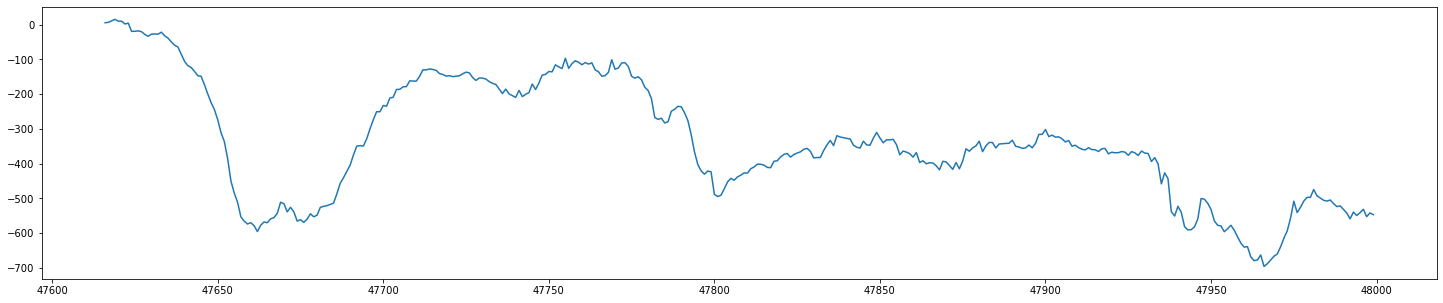

In [73]:
(val1['load']-train1.load[-1:].append(hwes_diff.forecast(96*4)).cumsum()[1:]).plot(figsize=(25,5))

In [74]:
# We can see a clear trend in the errors, which is not modelled .

In [75]:
print("Train RMSE:", rmse(train1['load'], hwes.fittedvalues))
print("Test RMSE:", rmse(val1['load'], hwes.forecast(96*4)-300))

Train RMSE: 27.785638393563527
Test RMSE: 283.74206798487546


In [76]:
print("Train MAE:", mae(train1['load'], hwes.fittedvalues))
print("Test MAE:", mae(val1['load'], hwes.forecast(96*4)-300))

Train MAE: 20.93336918504083
Test MAE: 230.81947798598398


In [77]:
mean_absolute_percentage_error(val1['load'], hwes.forecast(96*4)-300)

0.12335609654402195

<AxesSubplot:>

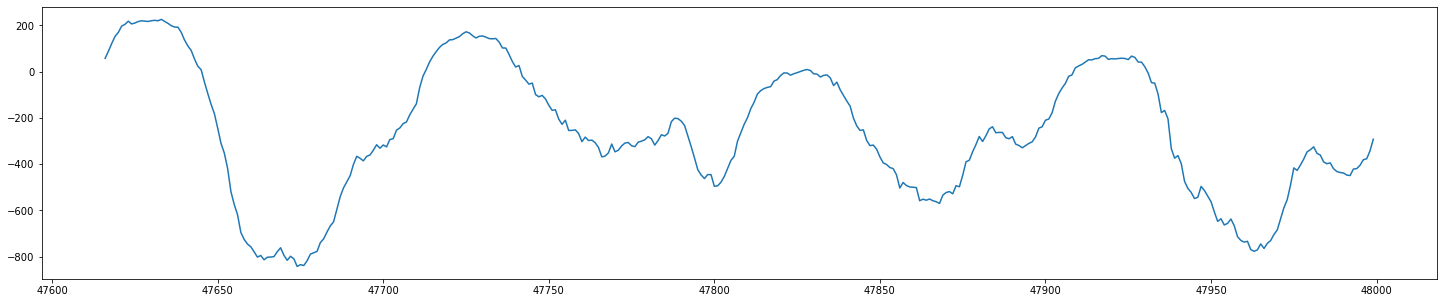

In [78]:
(val1['load']- hwes.forecast(96*4)).plot(figsize=(25,5)) # Normal data errors

<AxesSubplot:>

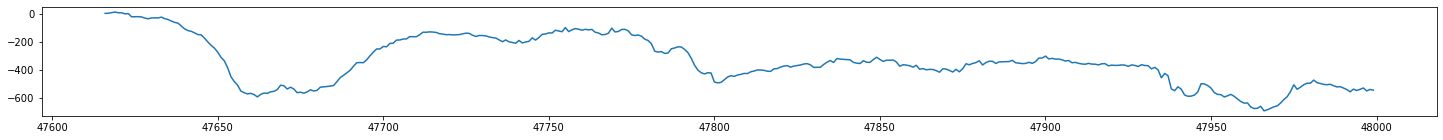

In [79]:
(val1['load']-train1.load[-1:].append(hwes_diff.forecast(96*4)).cumsum()[1:]).plot(figsize=(25,2))  # Differenced data errors

In [80]:
# We will be calulating the values for the test data once we are confident with the forecasting results.
# So forecasting will be done after checking the results from more complex models.

In [81]:
# We got the best MAPE as 8% so far with manual tuning 

In [82]:
# Lets try ARIMA models 

In [83]:
# Checkng the stationarity

In [84]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [85]:
result = adfuller(df.dropna().load)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.155770
p-value: 0.000000


In [86]:
result = adfuller(train1.load)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.328271
p-value: 0.000000


In [87]:
# So the data is Stationary.

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

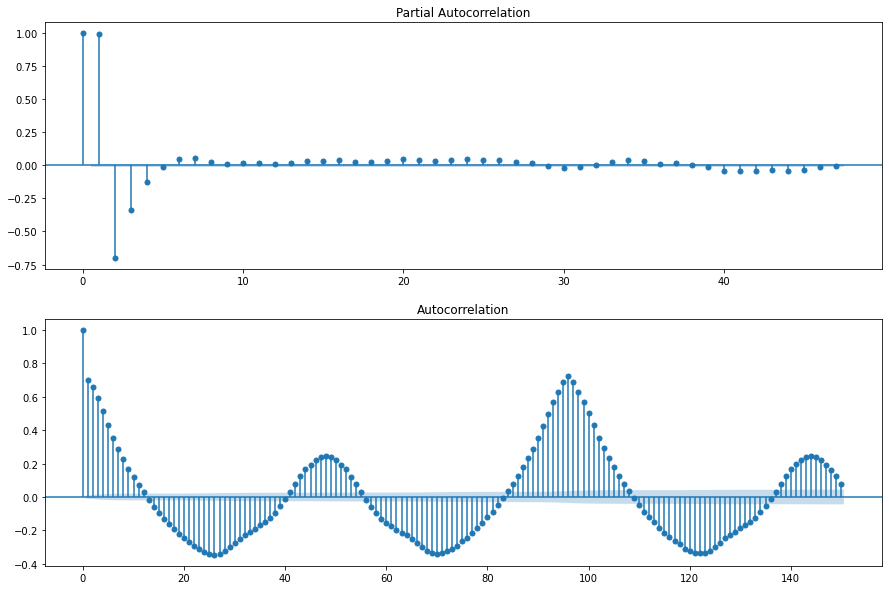

In [89]:
pyplot.figure(figsize=(15,10))

pyplot.subplot(211)
plot_pacf(train1.load, ax=pyplot.gca(),method='ols')

pyplot.subplot(212)
plot_acf(train1.load.diff()[1:], ax=pyplot.gca(),lags=150)
pyplot.show()

In [90]:
# Looking at the ACF and PACF graph, difficult to model using the SARIMA models,as the model can become complex to consider the 96 lag values.

In [91]:
train1=train1.set_index('datetime')
val1=val1.set_index('datetime')
Nval = 96*4

In [92]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(train1['load'], order=(1,0,5),seasonal_order=(1,0,1,10))
arima_result = arima.fit()
arima_result.summary()

C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               load   No. Observations:                47616
Model:             ARIMA(1, 0, 5)x(1, 0, [1], 10)   Log Likelihood             -214168.061
Date:                            Sun, 09 Jan 2022   AIC                         428356.122
Time:                                    09:39:13   BIC                         428443.831
Sample:                                01-01-2018   HQIC                        428383.659
                                     - 05-11-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1524.5494     44.761     34.059      0.000    1436.819    1612.280
ar.L1          0.9947      0.000   2026.186      0.000       0.994       0.996
ma.L1          0.4426      0.002    184.493      0.000       0.438       0.447
ma.L2          0.4374      0.003    145.570      0.000       0.432       0.443
ma.L3          0.3828      0.003    116.048      0.000       0.376       0.389
ma.L4          0.3132      0.003     90.183      0.000       0.306       0.320
ma.L5          0.2050      0.003     59.115      0.000       0.198       0.212
ar.S.L10       0.7655      0.030     25.559      0.000       0.707       0.824
ma.S.L10      -0.8024      0.028    -28.720      0.000      -0.857      -0.748
sigma2       472.8701      1.433    330.056      0.000     470.062     475.678
===================================================================================
Ljung-Box (L1) (Q):                  54.53   Jarque-Bera (JB):            110537.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
## Very difficult to use the actual seasonality values , as it will cause the out of memory error. 
## So its not a effective way to model this problem using ARIMA/SARIMA, as the model can become very complex and computationally expensive to build.

In [94]:
mean_absolute_percentage_error(val1['load'], arima_result.get_forecast(Nval).predicted_mean)

0.14527029376286196

In [95]:
print("Val RMSE:", rmse(val1['load'], arima_result.get_forecast(Nval).predicted_mean))
print("Val MAE:", mae(val1['load'], arima_result.get_forecast(Nval).predicted_mean))

Val RMSE: 330.794894740652
Val MAE: 276.4022328547633


In [96]:
mean_absolute_percentage_error(train1['load'], arima_result.predict(start=0, end=-1))

0.011064776389086697

<AxesSubplot:>

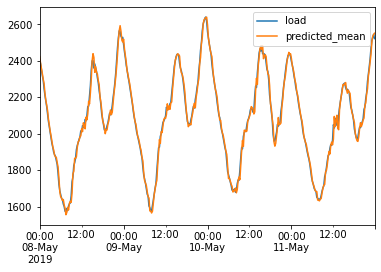

In [97]:
pd.concat([train1.load,pd.DataFrame(arima_result.predict(start=0, end=-1))],axis=1).iloc[-96*4:,:].plot()

<AxesSubplot:>

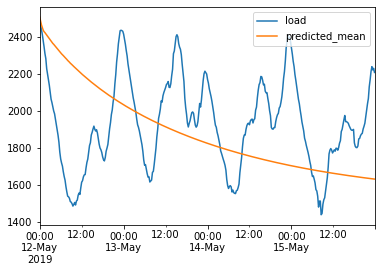

In [98]:
pd.concat([val1.load,pd.DataFrame((arima_result.get_forecast(Nval).predicted_mean))],axis=1).plot()

In [99]:
## The above model was built just to show that basic ARIMA cant work in this case, not for any comparision with the base model.

In [100]:
## We will do the ML way of approaching the time series

In [101]:
# train1.drop('load_diff',axis=1,inplace= True)

In [102]:
# Building a base ML model with out any feature engineering. 

In [103]:
len(train1)/96 # 496 days for training

496.0

In [104]:
len(val1)/96 # 4 days for validation

4.0

In [105]:
96,96*2,96*3,96*4

(96, 192, 288, 384)

# Modelling 

In [10]:
train1=df.iloc[:48000-96*4,:].set_index('datetime')
train1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2018-01-01 00:00:00   8.946000         0.0          0.0  
2018-01-01 00:15:00   8.911875         0.0          0.0  
2018-01-01 00:30:00   8.877750         0.0          0.0  
2018-01-01 00:45:00   8.843625         0.0          0.0  
2018-01-01 01:00:00   8.809500         0.0          0.0

In [11]:
val1=df.iloc[48000-96*4:48000,:].set_index('datetime')
val1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2019-05-12 00:00:00  2493.7102             34.083000    34.083000   0.31500   
2019-05-12 00:15:00  2468.3289             33.733875    33.733875   0.32025   
2019-05-12 00:30:00  2443.0284             33.384750    33.384750   0.32550   
2019-05-12 00:45:00  2414.4050             33.035625    33.035625   0.33075   
2019-05-12 01:00:00  2382.2062             32.686500    32.686500   0.33600   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-05-12 00:00:00    13.0200    2.110500        0.462  
2019-05-12 00:15:00    12.9885    2.044875        0.462  
2019-05-12 00:30:00    12.9570    1.979250        0.462  
2019-05-12 00:45:00    12.9255    1.913625        0.462  
2019-05-12 01:00:00    12.8940    1.848000        0.462

In [12]:
test1=df.iloc[48000:48000+96*4,:].set_index('datetime')
test1.tail()

load  apparent_temperature  temperature  humidity  \
datetime                                                                 
2019-05-19 22:45:00   NaN             34.568625    34.568625  0.328125   
2019-05-19 23:00:00   NaN             34.356000    34.356000  0.336000   
2019-05-19 23:15:00   NaN             31.762500    30.796500  0.399000   
2019-05-19 23:30:00   NaN             31.500000    30.607500  0.399000   
2019-05-19 23:45:00   NaN             31.500000    30.429000  0.399000   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-05-19 22:45:00  14.303625      0.3360       0.0000  
2019-05-19 23:00:00  14.490000      0.0945       0.0000  
2019-05-19 23:15:00  14.700000      2.1630       0.1995  
2019-05-19 23:30:00  14.700000      2.1630       0.2205  
2019-05-19 23:45:00  14.700000      2.1630       0.2310

In [13]:
train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

In [14]:
def time_features(train1):

    train1['Year']=train1.index.year
    train1['Hours']=train1.index.hour
    # train1['Minutes']=train1.index.minute
    train1['Month']=train1.index.month
    # train1['Day']=train1.index.day

    train1['quarter'] = train1.index.quarter
    train1['dayofyear'] = train1.index.dayofyear
    train1['weekofyear'] = train1.index.weekofyear

    train1['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in train1['Hours']]
    train1['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in train1['Hours']]

    train1['day_sin'] = [round(x, 3) for x in train1['day_sin']]
    train1['day_cos'] = [round(x, 3) for x in train1['day_cos']]

    train1['week/end']=list(pd.to_datetime(train1.reset_index().datetime).dt.dayofweek.apply(lambda x: 1 if (x==5)|(x==6) else 0))

    train1['timestamp'] = [x.timestamp() for x in train1.reset_index().datetime]

    # Seconds in day 
    s = 24 * 60 * 60 

    # Seconds in year 
    year = (365.25) * s

    train1['month_cos'] = [np.cos((x) * (2 * np.pi / year)) for x in train1['timestamp']]
    train1['month_sin'] = [np.sin((x) * (2 * np.pi / year)) for x in train1['timestamp']]

    return train1


In [15]:
def lag_features(df, window):
    
    # feature_cols = ['apparent_temperature','humidity', 'dew_point','wind_speed', 'cloud_cover',]
    feature_cols=['load','apparent_temperature']
    df_site = df.groupby(['Year','Month','Hours'])
    
    df_rolled = df_site[feature_cols].rolling(window=window, min_periods=0)
    
    df_mean = df_rolled.mean().astype(np.float16)
    df_median = df_rolled.median().astype(np.float16)
    df_min = df_rolled.min().astype(np.float16)
    df_max = df_rolled.max().astype(np.float16)
    df_std = df_rolled.std().astype(np.float16)
    df_skew = df_rolled.skew().astype(np.float16)
    
    for feature in feature_cols:
        
        df[f"{feature}_mean_lag{window}"] = list(df_mean[feature])
        df[f"{feature}_median_lag{window}"] = list(df_median[feature])
        df[f"{feature}_min_lag{window}"] = list(df_min[feature])
        df[f"{feature}_max_lag{window}"] = list(df_max[feature])
        df[f"{feature}_std_lag{window}"] = list(df_std[feature])
        df[f"{feature}_skew_lag{window}"] = list(df_skew[feature])
        
    return df

In [16]:
def lag_features_1(df,window=10):

    # feature_cols = ['apparent_temperature','humidity', 'dew_point','wind_speed', 'cloud_cover',]
    feature_cols=['load','apparent_temperature']
    df_site = df
    
    df_rolled = df_site[feature_cols].rolling(window=window, min_periods=0)
    
    df_mean = df_rolled.mean().astype(np.float16)
    df_median = df_rolled.median().astype(np.float16)
    df_min = df_rolled.min().astype(np.float16)
    df_max = df_rolled.max().astype(np.float16)
    df_std = df_rolled.std().astype(np.float16)
    df_skew = df_rolled.skew().astype(np.float16)
    
    for feature in feature_cols:
        
        df[f"{feature}_mean_lagn{window}"] = list(df_mean[feature])
        df[f"{feature}_median_lagn{window}"] = list(df_median[feature])
        df[f"{feature}_min_lagn{window}"] = list(df_min[feature])
        df[f"{feature}_max_lagn{window}"] = list(df_max[feature])
        df[f"{feature}_std_lagn{window}"] = list(df_std[feature])
        df[f"{feature}_skew_lagn{window}"] = list(df_skew[feature])

    return df

In [17]:
train1=time_features(train1)

In [18]:
# scaler = StandardScaler()

In [19]:
# train1_sc=pd.DataFrame(scaler.fit_transform(train1),columns=train1.columns,index=train1.index)

In [20]:
train1.shape

(47616, 23)

In [21]:
# lag_features(train1,4),lag_features(train1,8),lag_features(train1,12),lag_features(train1,16),lag_features(train1,32),lag_features(train1,64),lag_features(train1,96)
# print('done')

In [22]:
# lag_features(train1,10)

In [23]:
# lag_features(train1,15)

In [24]:
# lag_features(train1,20)

In [25]:
train1.shape

(47616, 23)

In [26]:
lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)
# ,lag_features_1(train1,96+96+16),lag_features_1(train1,96+96+32)
# lag_features_1(train1,96+96+48),lag_features_1(train1,96+96+64),lag_features_1(train1,96+96+72)
# lag_features_1(train1,96+96+84),lag_features_1(train1,96+96+96)

print('done')

done


In [27]:
train1.shape

(47616, 155)

In [28]:
# train1=lag_features(train1,10)

In [29]:
train1.isna().sum().sort_values(ascending=False)[:20]

apparent_temperature_skew_lagn4      1155
apparent_temperature_skew_lagn6       386
shifted_load_4day                     384
apparent_temperature_skew_lagn8       360
shifted_load_3day                     288
shifted_load_2day                     192
apparent_temperature_skew_lagn12      139
shifted_load_1day                      96
apparent_temperature_skew_lagn32        4
load_skew_lagn6                         2
apparent_temperature_skew_lagn192       2
load_skew_lagn8                         2
load_skew_lagn4                         2
apparent_temperature_skew_lagn128       2
load_skew_lagn128                       2
load_skew_lagn288                       2
load_skew_lagn12                        2
apparent_temperature_skew_lagn96        2
apparent_temperature_skew_lagn384       2
load_skew_lagn192                       2
dtype: int64

In [30]:
# train1.drop(['cloud_cover_skew_lag16','cloud_cover_skew_lag20'],axis=1,inplace=True)

In [31]:
val_pred_input=train1[train1.shifted_load_1day.isna()]

In [32]:
val_pred_input

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2019-05-11 00:00:00  2396.2553             32.917500    32.917500  0.325500   
2019-05-11 00:15:00  2376.6209             32.946375    32.946375  0.322875   
2019-05-11 00:30:00  2348.5126             32.975250    32.975250  0.320250   
2019-05-11 00:45:00  2315.5058             33.004125    33.004125  0.317625   
2019-05-11 01:00:00  2290.5992             33.033000    33.033000  0.315000   
...                        ...                   ...          ...       ...   
2019-05-11 22:45:00  2470.9953             35.600250    35.600250  0.278250   
2019-05-11 23:00:00  2511.8094             35.395500    35.395500  0.283500   
2019-05-11 23:15:00  2530.5853             34.650000    34.650000  0.378000   
2019-05-11 23:30:00  2545.5939             34.650000    34.650000  0.378000   
2019-05-11 23:45:00  2522.5255             34.125000    34.125000  0.367500   

                     dew_point  wind_speed  cloud_cover  shifted_load_1day  \
datetime                                                                     
2019-05-11 00:00:00  12.579000    2.047500       0.4620                NaN   
2019-05-11 00:15:00  12.568500    1.795500       0.4620                NaN   
2019-05-11 00:30:00  12.558000    1.543500       0.4620                NaN   
2019-05-11 00:45:00  12.547500    1.291500       0.4620                NaN   
2019-05-11 01:00:00  12.537000    1.039500       0.4620                NaN   
...                        ...         ...          ...                ...   
2019-05-11 22:45:00  12.355875    3.016125       0.4620                NaN   
2019-05-11 23:00:00  12.400500    3.076500       0.4620                NaN   
2019-05-11 23:15:00  14.437500    2.845500       0.3780                NaN   
2019-05-11 23:30:00  13.965000    2.971500       0.3780                NaN   
2019-05-11 23:45:00  13.492500    3.108000       0.3675                NaN   

                     shifted_load_2day  shifted_load_3day  ...  \
datetime                                                   ...   
2019-05-11 00:00:00                NaN                NaN  ...   
2019-05-11 00:15:00                NaN                NaN  ...   
2019-05-11 00:30:00                NaN                NaN  ...   
2019-05-11 00:45:00                NaN                NaN  ...   
2019-05-11 01:00:00                NaN                NaN  ...   
...                                ...                ...  ...   
2019-05-11 22:45:00                NaN                NaN  ...   
2019-05-11 23:00:00                NaN                NaN  ...   
2019-05-11 23:15:00                NaN                NaN  ...   
2019-05-11 23:30:00                NaN                NaN  ...   
2019-05-11 23:45:00                NaN                NaN  ...   

                     load_min_lagn384  load_max_lagn384  load_std_lagn384  \
datetime                                                                    
2019-05-11 00:00:00            1524.0            2640.0            266.25   
2019-05-11 00:15:00            1524.0            2640.0            266.50   
2019-05-11 00:30:00            1524.0            2640.0            266.75   
2019-05-11 00:45:00            1524.0            2640.0            267.00   
2019-05-11 01:00:00            1524.0            2640.0            267.25   
...                               ...               ...               ...   
2019-05-11 22:45:00            1575.0            2640.0            256.00   
2019-05-11 23:00:00            1575.0            2640.0            256.25   
2019-05-11 23:15:00            1575.0            2640.0            256.50   
2019-05-11 23:30:00            1575.0            2640.0            257.00   
2019-05-11 23:45:00            1575.0            2640.0            257.25   

                     load_skew_lagn384  apparent_temperature_mean_lagn384  \
datetime                                     

In [33]:
# Creating a holiday feature as load can vary due to holidays

In [34]:
import holidays

In [35]:
# holidays.India.PROVINCES

In [36]:
states=['CG', 'GJ','BR', 'RJ','HR','MP', 'UP', 'UK']

In [37]:
dates=[]
for i in states:
    for j in [2018,2019,2020]:
        for date,_ in holidays.India(years=j,prov=i).items():
            dates.append(date)

for j in [2018,2019,2020]:
    for date,_ in holidays.India(years=j).items():
        dates.append(date)


In [38]:
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [39]:
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [40]:
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [41]:
val_pred_input

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2019-05-11 00:00:00  2396.2553             32.917500    32.917500  0.325500   
2019-05-11 00:15:00  2376.6209             32.946375    32.946375  0.322875   
2019-05-11 00:30:00  2348.5126             32.975250    32.975250  0.320250   
2019-05-11 00:45:00  2315.5058             33.004125    33.004125  0.317625   
2019-05-11 01:00:00  2290.5992             33.033000    33.033000  0.315000   
...                        ...                   ...          ...       ...   
2019-05-11 22:45:00  2470.9953             35.600250    35.600250  0.278250   
2019-05-11 23:00:00  2511.8094             35.395500    35.395500  0.283500   
2019-05-11 23:15:00  2530.5853             34.650000    34.650000  0.378000   
2019-05-11 23:30:00  2545.5939             34.650000    34.650000  0.378000   
2019-05-11 23:45:00  2522.5255             34.125000    34.125000  0.367500   

                     dew_point  wind_speed  cloud_cover  shifted_load_1day  \
datetime                                                                     
2019-05-11 00:00:00  12.579000    2.047500       0.4620                NaN   
2019-05-11 00:15:00  12.568500    1.795500       0.4620                NaN   
2019-05-11 00:30:00  12.558000    1.543500       0.4620                NaN   
2019-05-11 00:45:00  12.547500    1.291500       0.4620                NaN   
2019-05-11 01:00:00  12.537000    1.039500       0.4620                NaN   
...                        ...         ...          ...                ...   
2019-05-11 22:45:00  12.355875    3.016125       0.4620                NaN   
2019-05-11 23:00:00  12.400500    3.076500       0.4620                NaN   
2019-05-11 23:15:00  14.437500    2.845500       0.3780                NaN   
2019-05-11 23:30:00  13.965000    2.971500       0.3780                NaN   
2019-05-11 23:45:00  13.492500    3.108000       0.3675                NaN   

                     shifted_load_2day  shifted_load_3day  ...  \
datetime                                                   ...   
2019-05-11 00:00:00                NaN                NaN  ...   
2019-05-11 00:15:00                NaN                NaN  ...   
2019-05-11 00:30:00                NaN                NaN  ...   
2019-05-11 00:45:00                NaN                NaN  ...   
2019-05-11 01:00:00                NaN                NaN  ...   
...                                ...                ...  ...   
2019-05-11 22:45:00                NaN                NaN  ...   
2019-05-11 23:00:00                NaN                NaN  ...   
2019-05-11 23:15:00                NaN                NaN  ...   
2019-05-11 23:30:00                NaN                NaN  ...   
2019-05-11 23:45:00                NaN                NaN  ...   

                     load_min_lagn384  load_max_lagn384  load_std_lagn384  \
datetime                                                                    
2019-05-11 00:00:00            1524.0            2640.0            266.25   
2019-05-11 00:15:00            1524.0            2640.0            266.50   
2019-05-11 00:30:00            1524.0            2640.0            266.75   
2019-05-11 00:45:00            1524.0            2640.0            267.00   
2019-05-11 01:00:00            1524.0            2640.0            267.25   
...                               ...               ...               ...   
2019-05-11 22:45:00            1575.0            2640.0            256.00   
2019-05-11 23:00:00            1575.0            2640.0            256.25   
2019-05-11 23:15:00            1575.0            2640.0            256.50   
2019-05-11 23:30:00            1575.0            2640.0            257.00   
2019-05-11 23:45:00            1575.0            2640.0            257.25   

                     load_skew_lagn384  apparent_temperature_mean_lagn384  \
datetime                                     

In [42]:
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [43]:
train1.columns

Index(['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_speed', 'cloud_cover', 'shifted_load_1day', 'shifted_load_2day',
       'shifted_load_3day',
       ...
       'load_max_lagn384', 'load_std_lagn384', 'load_skew_lagn384',
       'apparent_temperature_mean_lagn384',
       'apparent_temperature_median_lagn384',
       'apparent_temperature_min_lagn384', 'apparent_temperature_max_lagn384',
       'apparent_temperature_std_lagn384', 'apparent_temperature_skew_lagn384',
       'holiday'],
      dtype='object', length=156)

In [44]:
# day1=train1[['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
#        'wind_speed', 'cloud_cover', 'holiday','shifted_load_1day']]
# day2=train1[['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
#        'wind_speed', 'cloud_cover', 'holiday','shifted_load_2day']]
# day3=train1[['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
#        'wind_speed', 'cloud_cover', 'holiday','shifted_load_3day']]
# day4=train1[['load', 'apparent_temperature', 'temperature', 'humidity', 'dew_point',
#        'wind_speed', 'cloud_cover', 'holiday','shifted_load_4day']]

day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

In [45]:
day1.dropna(inplace=True)

In [46]:
# day1=time_features(day1)
# day2=time_features(day2)
# day3=time_features(day3)
# day4=time_features(day4)
# val1=time_features(val1)
# val_pred_input=time_features(val_pred_input)

In [47]:
feat_sel=['load', 'month_cos', 'apparent_temperature', 'day_cos', 'apparent_temperature_max_lag10', 'Hours', 'dayofyear', 'week/end', 'day_sin', 'weekofyear', 'temperature', 'apparent_temperature_mean_lag10', 'Year', 'apparent_temperature_median_lag10', 'month_sin', 'timestamp', 'Day', 'Month', 'holiday', 'humidity']

In [48]:
day1.describe()

load  apparent_temperature   temperature      humidity  \
count  46331.000000          46331.000000  46331.000000  46331.000000   
mean    1526.068221             27.436842     25.972849      0.618402   
std      518.216286             10.518173      8.944667      0.243347   
min      480.631730              2.583000      3.685500      0.063000   
25%     1186.921700             18.910500     18.905250      0.420000   
50%     1459.793400             27.678000     27.321000      0.619500   
75%     1863.010650             36.059917     32.744250      0.824250   
max     3132.646300             56.731500     47.943000      1.050000   

          dew_point    wind_speed   cloud_cover  shifted_load_1day  \
count  46331.000000  46331.000000  46331.000000       46331.000000   
mean      15.211774      2.381873      0.286957        1528.146463   
std        6.870535      1.449867      0.317018         518.269356   
min       -1.491000      0.000000      0.000000         480.631730   
25%       10.056375      1.370250      0.000000        1188.098350   
50%       13.878375      2.344125      0.194250        1461.833600   
75%       19.813500      3.325875      0.462000        1866.010350   
max       29.410500      9.586500      1.050000        3132.646300   

               Year         Hours  ...  load_max_lagn384  load_std_lagn384  \
count  46331.000000  46331.000000  ...      46331.000000      46331.000000   
mean    2018.264143     11.566575  ...       1989.250286        256.824142   
std        0.440880      6.906619  ...        498.021137         64.300206   
min     2018.000000      0.000000  ...        803.000000         36.125000   
25%     2018.000000      6.000000  ...       1594.000000        205.125000   
50%     2018.000000     12.000000  ...       1829.000000        254.500000   
75%     2019.000000     18.000000  ...       2384.000000        315.750000   
max     2019.000000     23.000000  ...       3132.000000        422.250000   

       load_skew_lagn384  apparent_temperature_mean_lagn384  \
count       46331.000000                       46331.000000   
mean           -0.239006                          27.292771   
std             0.239913                           9.523420   
min            -0.845703                           8.648438   
25%            -0.401001                          18.093750   
50%            -0.268311                          27.218750   
75%            -0.089752                          35.750000   
max             1.590820                          44.031250   

       apparent_temperature_median_lagn384  apparent_temperature_min_lagn384  \
count                         46331.000000                      46331.000000   
mean                             26.868835                         19.032126   
std                               9.705579                          9.463032   
min                               8.507812                          2.582031   
25%                              17.421875                         10.960938   
50%                              26.578125                         18.656250   
75%                              35.562500                         27.484375   
max                              43.937500                         37.156250   

       apparent_temperature_max_lagn384  apparent_temperature_std_lagn384  \
count                      46331.000000                      46331.000000   
mean                          36.185428                          4.465905   
std                            9.855980                          0.688658   
min                           10.460938                          0.131226   
25%                           27.109375                          4.015625   
50%                           36.687500                          4.480469   
75%                           44.500000                          4.937500   
max                           56.718750                          6.515625   

       apparent_temperature_skew_lagn384

In [49]:
import xgboost

In [50]:
# scaler1 = StandardScaler()

In [51]:
# scaler1.fit(train1[['load']])

In [52]:
val1.load=list(val1['load'])

In [53]:
# # A parameter grid for XGBoost
# params = {
#         'learning_rate':[0.01,0.03,0.1,0.2],
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5],
#         'iterators':[1000,2000,3000,5000,10000]
#         }

In [54]:
# from sklearn.model_selection import KFold

In [55]:
# folds = 2
# param_comb = 5

# skf = KFold(n_splits=folds, shuffle = False)

In [56]:
xgb = xgboost.XGBRegressor()

In [57]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [58]:
# random_search = RandomizedSearchCV(xgb, param_distributions=params,n_iter=100, n_jobs=4, cv=skf.split(X1,y1), verbose=3)

In [59]:
# random_search.fit(X1, y1)

In [60]:
# random_search.best_estimator_

In [61]:
from sklearn import metrics

In [62]:
# metrics.SCORERS.keys()

In [63]:
import gc 
gc.collect()

255

0.10660574612090427


<AxesSubplot:xlabel='datetime'>

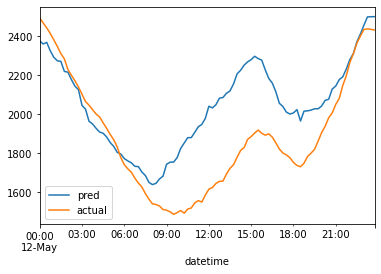

In [88]:

X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

# model1=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.6, gamma=2, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              iterators=10000, learning_rate=0.1, max_delta_step=0, max_depth=5,
#              min_child_weight=5,monotone_constraints='()',
#              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
#              tree_method='exact', validate_parameters=1, verbosity=None)
model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


# print(mean_absolute_percentage_error(scaler1.inverse_transform(np.array(val1.load[:96])), scaler1.inverse_transform(day_1_pred)))
# pd.concat([pd.DataFrame(scaler1.inverse_transform(day_1_pred),columns=['pred']),pd.DataFrame(scaler1.inverse_transform(np.array(val1.load[:96])),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()

In [85]:

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))

0.0863556280911761


In [86]:
mean_absolute_percentage_error(y1,model1.predict(X1))

0.07452717136806897

<AxesSubplot:>

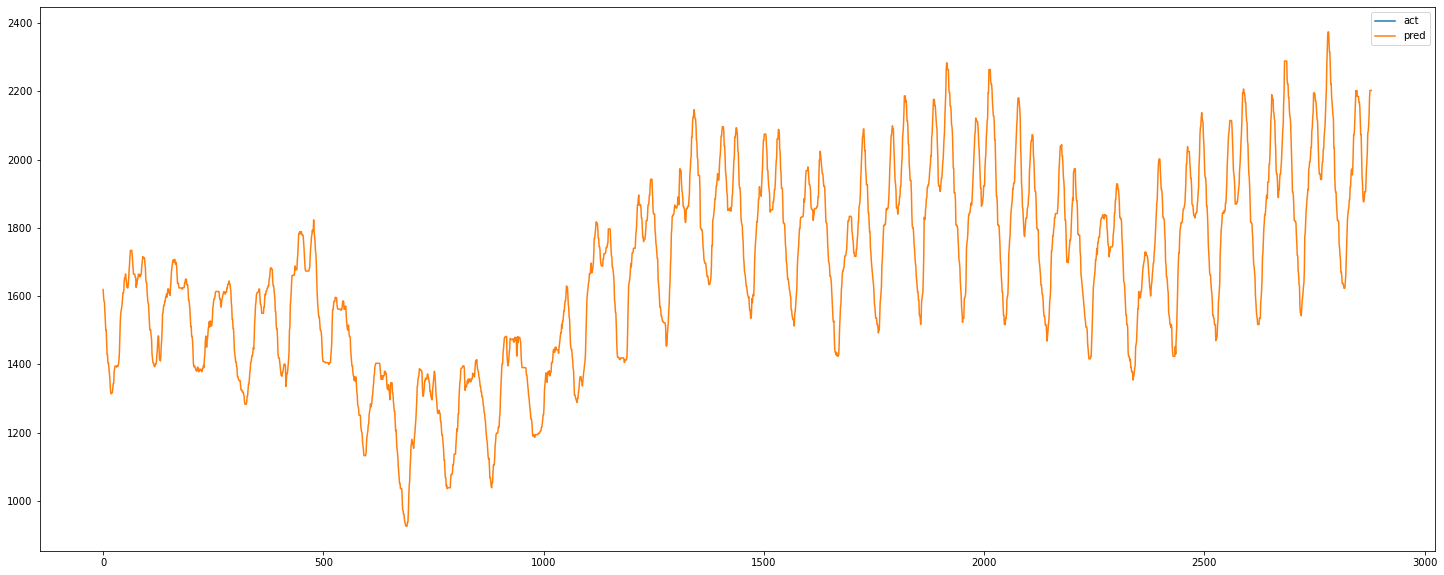

In [87]:
pd.concat([pd.DataFrame(y1[-96*30:],columns=['act']),pd.DataFrame(model1.predict(X1)[-96*30:],columns=['pred'])],axis=1).plot(figsize=(25,10))

In [76]:
print("Val RMSE:", rmse(day_1_pred, np.array(val1.load[:96])))
print("Val MAE:", mae(day_1_pred, np.array(val1.load[:96])))

NameError: name 'rmse' is not defined

0.04706395024968862


<AxesSubplot:xlabel='datetime'>

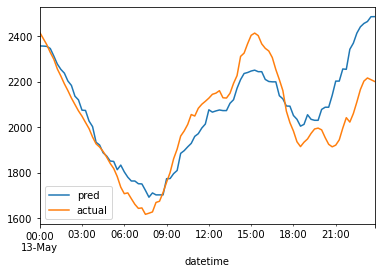

In [836]:
day2.dropna(inplace=True)
X2=day2.drop('shifted_load_2day',axis=1)[list(set(dict_2_k))[:25]]
y1=day1.shifted_load_1day
y2=day2.shifted_load_2day
model2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model2.fit(X2,y2)
val_pred_input2=val_pred_input[X2.columns]
day_2_pred=model2.predict(val_pred_input2)
print(mean_absolute_percentage_error(np.array(val1.load[96:192]), day_2_pred))
pd.concat([pd.DataFrame(day_2_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96:192]),columns=['actual'])],axis=1).set_index(val1.index[96:192]).plot()


0.031995122436346494


<AxesSubplot:xlabel='datetime'>

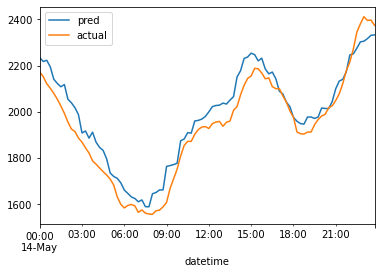

In [838]:
day3.dropna(inplace=True)
X3=day3.drop('shifted_load_3day',axis=1)[list(set(dict_3_k))[:20]]
y3=day3.shifted_load_3day
model3 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model3.fit(X3,y3)
val_pred_input3=val_pred_input[X3.columns]
day_3_pred=model3.predict(val_pred_input3)
print(mean_absolute_percentage_error(np.array(val1.load[192:96*3]), day_3_pred))
pd.concat([pd.DataFrame(day_3_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[192:96*3]),columns=['actual'])],axis=1).set_index(val1.index[192:96*3]).plot()


0.06895923346013233


<AxesSubplot:xlabel='datetime'>

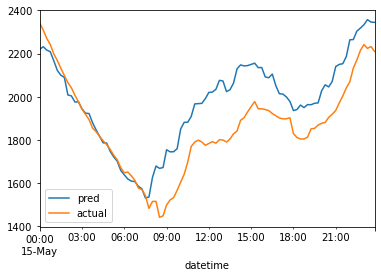

In [671]:
day4.dropna(inplace=True)
X4=day4.drop('shifted_load_4day',axis=1)[list(set(dict_4_k))[:12]]
y1=day1.shifted_load_1day
y4=day4.shifted_load_4day
model4 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model4.fit(X4,y4)

val_pred_input4=val_pred_input[X4.columns]

day_4_pred=model4.predict(val_pred_input4)
print(mean_absolute_percentage_error(np.array(val1.load[96*3:96*4]), day_4_pred))
pd.concat([pd.DataFrame(day_4_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96*3:96*4]),columns=['actual'])],axis=1).set_index(val1.index[96*3:96*4]).plot()


In [603]:
dict1={}
for i,j in zip(X1.columns,model1.feature_importances_):
    dict1[i]=j
dict_1_k=dict(sorted(dict1.items(), key=lambda item: item[1],reverse=True)[:35]).keys()

In [604]:
dict2={}
for i,j in zip(X1.columns,model2.feature_importances_):
    dict2[i]=j
dict_2_k=dict(sorted(dict2.items(), key=lambda item: item[1],reverse=True)[:35]).keys()

In [605]:
dict3={}
for i,j in zip(X1.columns,model3.feature_importances_):
    dict3[i]=j
dict_3_k=dict(sorted(dict3.items(), key=lambda item: item[1],reverse=True)[:35]).keys()

In [606]:
dict4={}
for i,j in zip(X1.columns,model4.feature_importances_):
    dict4[i]=j
dict_4_k=dict(sorted(dict4.items(), key=lambda item: item[1],reverse=True)[:35]).keys()
    

In [615]:
feature_sele=list(set(dict_1_k).union(set(dict_2_k)).union(set(dict_3_k)).union(set(dict_4_k)))

In [616]:
len(feature_sele)

54

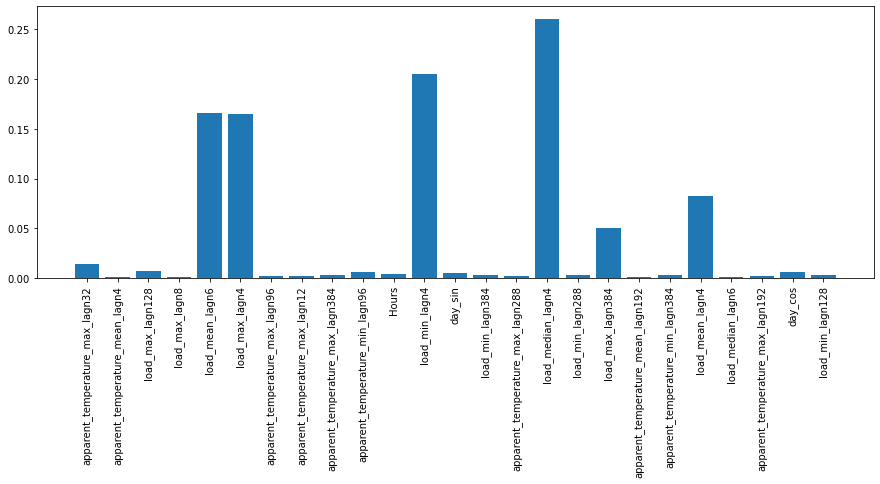

In [712]:
plt.figure(figsize=(15,5))
zip(X1.columns,model1.feature_importances_)
plt.bar(X1.columns,model1.feature_importances_)
plt.xticks(rotation=90)
plt.show()

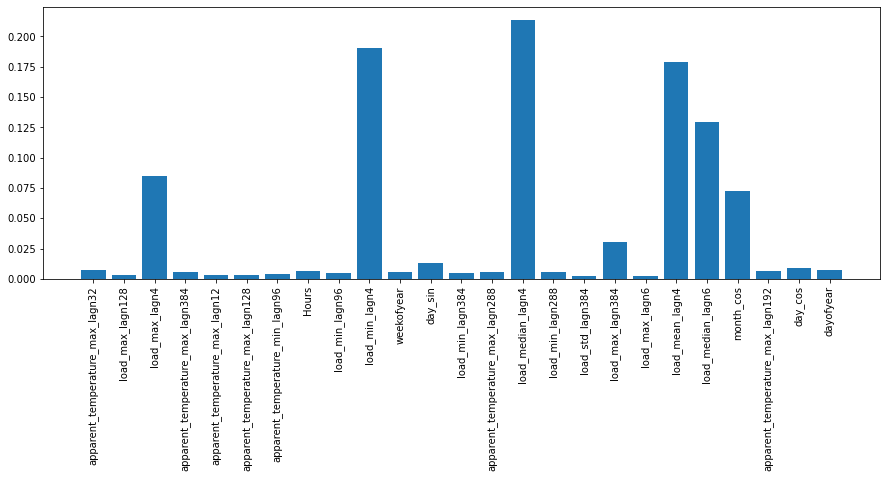

In [713]:
plt.figure(figsize=(15,5))
zip(X2.columns,model2.feature_importances_)
plt.bar(X2.columns,model2.feature_importances_)
plt.xticks(rotation=90)
plt.show()

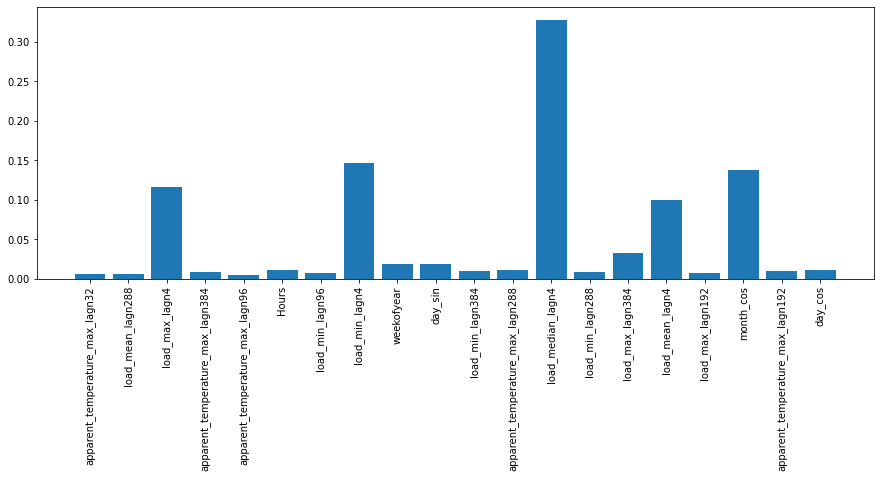

In [714]:
plt.figure(figsize=(15,5))
zip(X3.columns,model3.feature_importances_)
plt.bar(X3.columns,model3.feature_importances_)
plt.xticks(rotation=90)
plt.show()

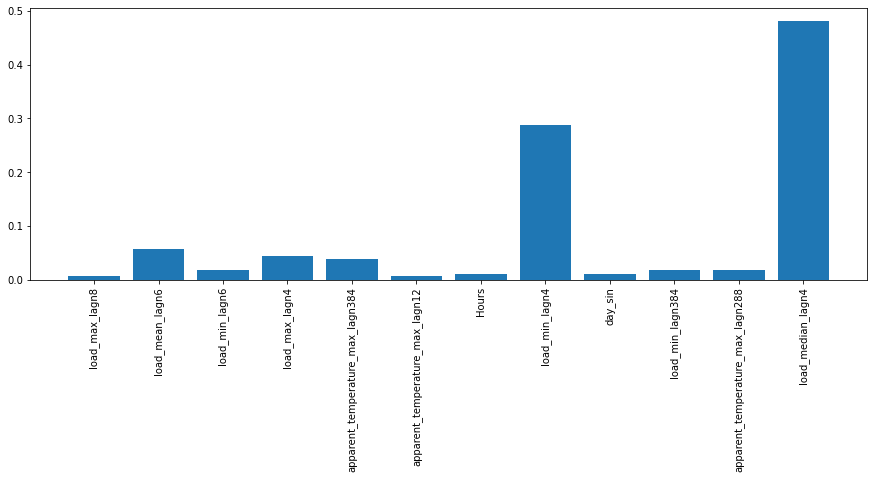

In [715]:
plt.figure(figsize=(15,5))
zip(X4.columns,model4.feature_importances_)
plt.bar(X4.columns,model4.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [685]:
print(mean_absolute_percentage_error(np.array(val1.load[:96*4]), np.array(list(day_1_pred)+list(day_2_pred)+list(day_3_pred)+list(day_4_pred))))

0.05547936194095121


In [613]:
print(mean_absolute_percentage_error(np.array(val1.load[96*1:96*3]), np.array(list(day_3_pred)+list(day_2_pred))))

0.06042591378174945


<AxesSubplot:xlabel='datetime'>

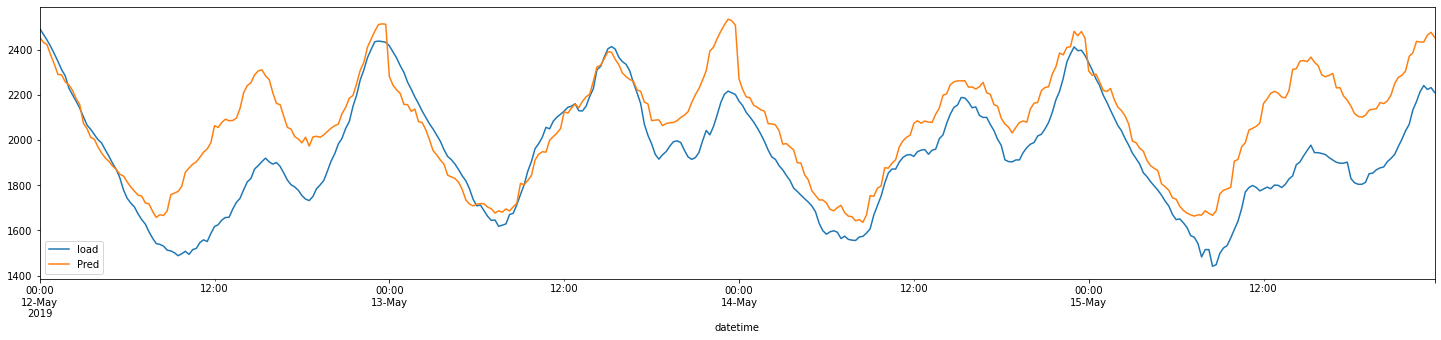

In [614]:
pd.concat([val1.load,pd.DataFrame(np.array(list(day_1_pred)+list(day_2_pred)+list(day_3_pred)+list(day_4_pred)),index=val1.index,columns=['Pred'])],axis=1).plot(figsize=(25,5))

In [684]:
df.iloc[53759:,:]

datetime       load  apparent_temperature  temperature  \
53759  2019-07-14 23:45:00  2795.3972             32.550000    32.161500   
53760  2019-07-15 00:00:00        NaN             35.532000    32.224500   
53761  2019-07-15 00:15:00        NaN             35.146125    31.846500   
53762  2019-07-15 00:30:00        NaN             34.760250    31.468500   
53763  2019-07-15 00:45:00        NaN             34.374375    31.090500   
...                    ...        ...                   ...          ...   
103579 2020-12-14 22:45:00        NaN             12.450375    12.450375   
103580 2020-12-14 23:00:00        NaN             12.285000    12.285000   
103581 2020-12-14 23:15:00        NaN             13.650000    13.650000   
103582 2020-12-14 23:30:00        NaN             13.650000    13.650000   
103583 2020-12-14 23:45:00        NaN             13.387500    13.387500   

        humidity  dew_point  wind_speed  cloud_cover  
53759   0.745500  25.200000      2.7090       0.7875  
53760   0.609000  22.701000      4.4310       0.7875  
53761   0.627375  22.813875      4.4625       0.7875  
53762   0.645750  22.926750      4.4940       0.7875  
53763   0.664125  23.039625      4.5255       0.7875  
...          ...        ...         ...          ...  
103579  0.611625   4.087125      1.9110       0.0000  
103580  0.619500   4.084500      1.8795       0.0000  
103581  0.829500   8.589000      2.4675       0.8925  
103582  0.829500   8.610000      2.4150       0.8925  
103583  0.840000   8.662500      2.4150       0.8610  

[49825 rows x 8 columns]

In [682]:
null_day_df[null_day_df.load.isna()].iloc[96*4:96*4+96*4,:] # Second Four day Nan Analysis

datetime  load  consec_count
53760 2019-07-15 00:00:00   NaN             1
53761 2019-07-15 00:15:00   NaN             1
53762 2019-07-15 00:30:00   NaN             1
53763 2019-07-15 00:45:00   NaN             1
53764 2019-07-15 01:00:00   NaN             1
...                   ...   ...           ...
54139 2019-07-18 22:45:00   NaN             4
54140 2019-07-18 23:00:00   NaN             4
54141 2019-07-18 23:15:00   NaN             4
54142 2019-07-18 23:30:00   NaN             4
54143 2019-07-18 23:45:00   NaN             4

[384 rows x 3 columns]

In [ ]:
df.iloc[53760-96*5:53760,:]

datetime       load  apparent_temperature  temperature  \
53280 2019-07-10 00:00:00  2589.9935               38.3775    31.594500   
53281 2019-07-10 00:15:00  2560.4813               38.5980    31.628625   
53282 2019-07-10 00:30:00  2534.4536               38.8185    31.662750   
53283 2019-07-10 00:45:00  2498.2956               39.0390    31.696875   
53284 2019-07-10 01:00:00  2486.6099               39.2595    31.731000   
...                   ...        ...                   ...          ...   
53755 2019-07-14 22:45:00  2834.5145               38.0100    33.589500   
53756 2019-07-14 23:00:00  2867.7738               37.6950    33.400500   
53757 2019-07-14 23:15:00  2855.8154               32.2875    32.424000   
53758 2019-07-14 23:30:00  2824.5458               32.5500    32.287500   
53759 2019-07-14 23:45:00  2795.3972               32.5500    32.161500   

       humidity  dew_point  wind_speed  cloud_cover  
53280  0.787500  26.428500     3.97950     0.787500  
53281  0.792750  26.562375     3.92175     0.787500  
53282  0.798000  26.696250     3.86400     0.787500  
53283  0.803250  26.830125     3.80625     0.787500  
53284  0.808500  26.964000     3.74850     0.787500  
...         ...        ...         ...          ...  
53755  0.595875  23.551500     4.30500     0.795375  
53756  0.598500  23.478000     4.31550     0.798000  
53757  0.735000  24.937500     2.70900     0.787500  
53758  0.745500  25.200000     2.70900     0.787500  
53759  0.745500  25.200000     2.70900     0.787500  

[480 rows x 8 columns]

In [ ]:
input_2=df.iloc[53760-96*5:53760-96*4,:].set_index('datetime')

In [ ]:
val2=df.iloc[53760-96*4:53760,:].set_index('datetime')

In [ ]:
input_2=time_features(input_2)

In [ ]:
input_2=lag_features(input_2,10)

In [ ]:
input_2['holiday']=list(input_2.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [ ]:
input_2=input_2[feat_sel]

0.04433158568175518


<AxesSubplot:xlabel='datetime'>

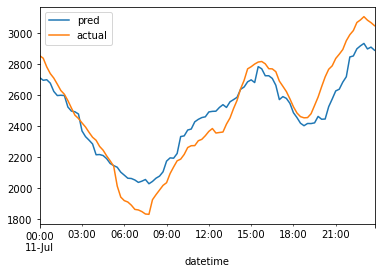

In [ ]:
day_1_pred2=model1.predict(input_2)
print(mean_absolute_percentage_error(np.array(val2.load[:96]), day_1_pred2))
pd.concat([pd.DataFrame(day_1_pred2,columns=['pred']),pd.DataFrame(np.array(val2.load[:96]),columns=['actual'])],axis=1).set_index(val2.index[:96]).plot()

0.10242258823970231


<AxesSubplot:xlabel='datetime'>

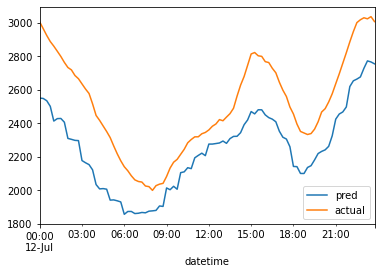

In [ ]:
day_2_pred2=model2.predict(input_2)
print(mean_absolute_percentage_error(np.array(val2.load[96:96*2]), day_2_pred2))
pd.concat([pd.DataFrame(day_2_pred2,columns=['pred']),pd.DataFrame(np.array(val2.load[96:96*2]),columns=['actual'])],axis=1).set_index(val2.index[96:96*2]).plot()

0.1851566639051859


<AxesSubplot:xlabel='datetime'>

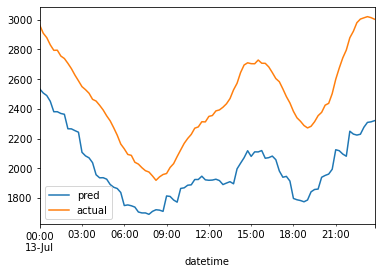

In [ ]:
day_3_pred2=model3.predict(input_2)
print(mean_absolute_percentage_error(np.array(val2.load[96*2:96*3]), day_3_pred2))
pd.concat([pd.DataFrame(day_3_pred2,columns=['pred']),pd.DataFrame(np.array(val2.load[96*2:96*3]),columns=['actual'])],axis=1).set_index(val2.index[96*2:96*3]).plot()

0.08919147647606167


<AxesSubplot:xlabel='datetime'>

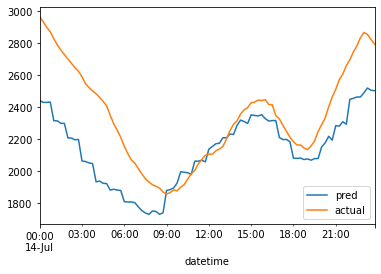

In [ ]:
day_4_pred2=model4.predict(input_2)
print(mean_absolute_percentage_error(np.array(val2.load[96*3:96*4]), day_4_pred2))
pd.concat([pd.DataFrame(day_4_pred2,columns=['pred']),pd.DataFrame(np.array(val2.load[96*3:96*4]),columns=['actual'])],axis=1).set_index(val2.index[96*3:96*4]).plot()

In [ ]:
print(mean_absolute_percentage_error(np.array(val2.load), np.array(list(day_1_pred2)+list(day_2_pred2)+list(day_3_pred2)+list(day_4_pred2))))

0.10527557857567627


<AxesSubplot:xlabel='datetime'>

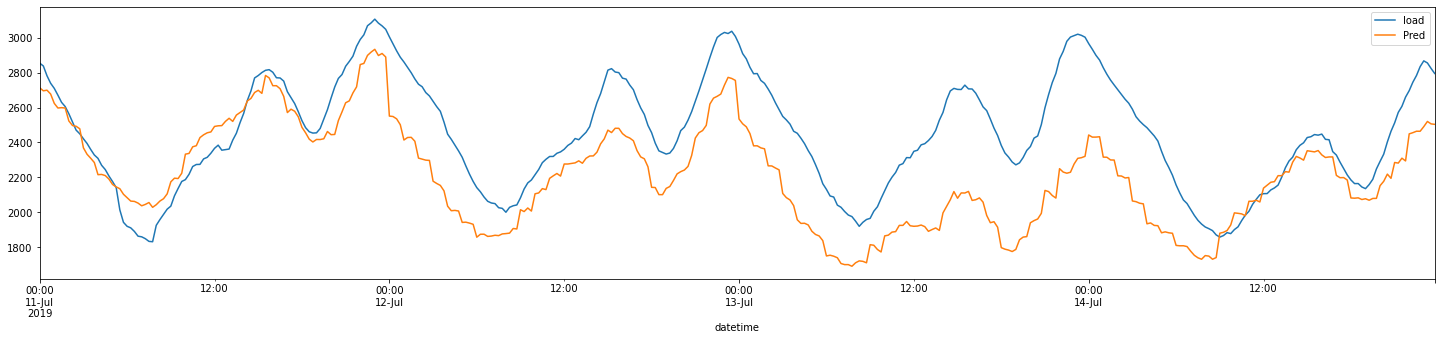

In [ ]:
pd.concat([val2.load,pd.DataFrame(np.array(list(day_1_pred2)+list(day_2_pred2)+list(day_3_pred2)+list(day_4_pred2)),index=val2.index,columns=['Pred'])],axis=1).plot(figsize=(25,5))

# 2

In [695]:
train1=df.iloc[:53760-96*4,:].set_index('datetime')
train1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2018-01-01 00:00:00   8.946000         0.0          0.0  
2018-01-01 00:15:00   8.911875         0.0          0.0  
2018-01-01 00:30:00   8.877750         0.0          0.0  
2018-01-01 00:45:00   8.843625         0.0          0.0  
2018-01-01 01:00:00   8.809500         0.0          0.0

In [696]:
val1=df.iloc[53760-96*4:53760,:].set_index('datetime')
val1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2019-07-11 00:00:00  2854.6741             43.207500     36.92850     0.525   
2019-07-11 00:15:00  2838.3929             42.868875     36.80775     0.525   
2019-07-11 00:30:00  2782.4288             42.530250     36.68700     0.525   
2019-07-11 00:45:00  2739.4129             42.191625     36.56625     0.525   
2019-07-11 01:00:00  2710.1633             41.853000     36.44550     0.525   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-07-11 00:00:00  24.402000      2.4465        0.462  
2019-07-11 00:15:00  24.247125      2.5725        0.462  
2019-07-11 00:30:00  24.092250      2.6985        0.462  
2019-07-11 00:45:00  23.937375      2.8245        0.462  
2019-07-11 01:00:00  23.782500      2.9505        0.462

In [697]:
test1=df.iloc[53760:53760+96*4,:].set_index('datetime')
test1.tail()

load  apparent_temperature  temperature  humidity  \
datetime                                                                 
2019-07-18 22:45:00   NaN             32.804625    29.260875   0.80325   
2019-07-18 23:00:00   NaN             32.277000    28.990500   0.80850   
2019-07-18 23:15:00   NaN             35.857500    29.557500   0.82950   
2019-07-18 23:30:00   NaN             35.805000    29.505000   0.84000   
2019-07-18 23:45:00   NaN             35.752500    29.452500   0.85050   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-07-18 22:45:00  24.472875      0.5985       0.4620  
2019-07-18 23:00:00  24.339000      0.7980       0.4620  
2019-07-18 23:15:00  25.987500      1.0815       0.1050  
2019-07-18 23:30:00  26.250000      1.0815       0.1155  
2019-07-18 23:45:00  26.250000      1.0815       0.1260

In [698]:
train1.dropna(inplace=True)

In [699]:
train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

In [700]:
train1=time_features(train1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


In [701]:
lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)
# ,lag_features_1(train1,96+96+16),lag_features_1(train1,96+96+32)
# lag_features_1(train1,96+96+48),lag_features_1(train1,96+96+64),lag_features_1(train1,96+96+72)
# lag_features_1(train1,96+96+84),lag_features_1(train1,96+96+96)

print('done')

done


In [702]:
val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

In [707]:
day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

0.045730913013588705


<AxesSubplot:xlabel='datetime'>

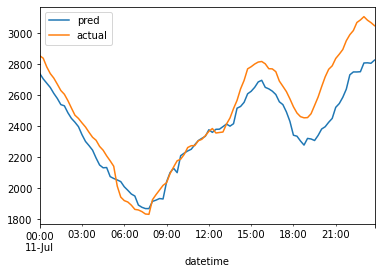

In [708]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


0.05087404740395526


<AxesSubplot:xlabel='datetime'>

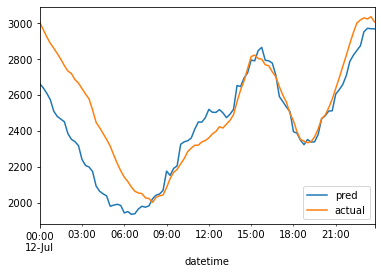

In [709]:
day2.dropna(inplace=True)
X2=day2.drop('shifted_load_2day',axis=1)[list(set(dict_2_k))[:25]]
y1=day1.shifted_load_1day
y2=day2.shifted_load_2day
model2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model2.fit(X2,y2)
val_pred_input2=val_pred_input[X2.columns]
day_2_pred=model2.predict(val_pred_input2)
print(mean_absolute_percentage_error(np.array(val1.load[96:192]), day_2_pred))
pd.concat([pd.DataFrame(day_2_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96:192]),columns=['actual'])],axis=1).set_index(val1.index[96:192]).plot()


0.04466858543663508


<AxesSubplot:xlabel='datetime'>

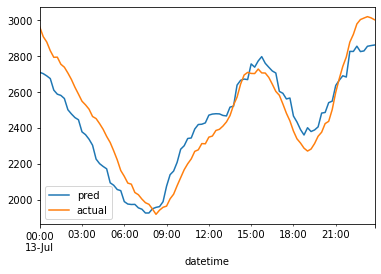

In [710]:
day3.dropna(inplace=True)
X3=day3.drop('shifted_load_3day',axis=1)[list(set(dict_3_k))[:20]]
y3=day3.shifted_load_3day
model3 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model3.fit(X3,y3)
val_pred_input3=val_pred_input[X3.columns]
day_3_pred=model3.predict(val_pred_input3)
print(mean_absolute_percentage_error(np.array(val1.load[192:96*3]), day_3_pred))
pd.concat([pd.DataFrame(day_3_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[192:96*3]),columns=['actual'])],axis=1).set_index(val1.index[192:96*3]).plot()


0.08979051050306809


<AxesSubplot:xlabel='datetime'>

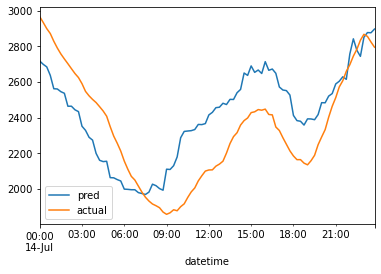

In [723]:
day4.dropna(inplace=True)
X4=day4.drop('shifted_load_4day',axis=1)[list(set(dict_4_k))[:12]]
y1=day1.shifted_load_1day
y4=day4.shifted_load_4day
model4 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=2000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model4.fit(X4,y4)

val_pred_input4=val_pred_input[X4.columns]

day_4_pred=model4.predict(val_pred_input4)
print(mean_absolute_percentage_error(np.array(val1.load[96*3:96*4]), day_4_pred))
pd.concat([pd.DataFrame(day_4_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96*3:96*4]),columns=['actual'])],axis=1).set_index(val1.index[96*3:96*4]).plot()


In [ ]:
null_day_df[null_day_df.load.isna()].iloc[:96*4,:] 

# 3

In [729]:
train1=df.iloc[:63744-96,:].set_index('datetime')
train1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                      
2018-01-01 00:00:00  803.22270              10.45800     10.45800  0.955500   
2018-01-01 00:15:00  774.89523              10.32675     10.32675  0.961625   
2018-01-01 00:30:00  731.46927              10.19550     10.19550  0.967750   
2018-01-01 00:45:00  713.93870              10.06425     10.06425  0.973875   
2018-01-01 01:00:00  699.23007               9.93300      9.93300  0.980000   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2018-01-01 00:00:00   8.946000         0.0          0.0  
2018-01-01 00:15:00   8.911875         0.0          0.0  
2018-01-01 00:30:00   8.877750         0.0          0.0  
2018-01-01 00:45:00   8.843625         0.0          0.0  
2018-01-01 01:00:00   8.809500         0.0          0.0

In [730]:
val1=df.iloc[63744-96:63744,:].set_index('datetime')
val1.head()

load  apparent_temperature  temperature  humidity  \
datetime                                                                       
2019-10-26 00:00:00  1103.85930                23.457       23.457   0.66150   
2019-10-26 00:15:00  1074.31680                23.331       23.331   0.66675   
2019-10-26 00:30:00  1047.38010                23.205       23.205   0.67200   
2019-10-26 00:45:00  1026.06203                23.079       23.079   0.67725   
2019-10-26 01:00:00  1023.66530                22.953       22.953   0.68250   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-10-26 00:00:00    15.6660      1.6695          0.0  
2019-10-26 00:15:00    15.6765      1.8480          0.0  
2019-10-26 00:30:00    15.6870      2.0265          0.0  
2019-10-26 00:45:00    15.6975      2.2050          0.0  
2019-10-26 01:00:00    15.7080      2.3835          0.0

In [733]:
test1=df.iloc[63744:63744+96,:].set_index('datetime')
test1.tail()

load  apparent_temperature  temperature  humidity  \
datetime                                                                 
2019-10-27 22:45:00   NaN             25.318125    25.318125  0.527625   
2019-10-27 23:00:00   NaN             25.053000    25.053000  0.535500   
2019-10-27 23:15:00   NaN             24.150000    24.150000  0.609000   
2019-10-27 23:30:00   NaN             24.150000    24.150000  0.609000   
2019-10-27 23:45:00   NaN             23.887500    23.887500  0.619500   

                     dew_point  wind_speed  cloud_cover  
datetime                                                 
2019-10-27 22:45:00  13.752375    0.112875       0.0000  
2019-10-27 23:00:00  13.776000    0.115500       0.0000  
2019-10-27 23:15:00  14.962500    1.050000       0.0105  
2019-10-27 23:30:00  14.700000    1.050000       0.0105  
2019-10-27 23:45:00  14.700000    1.050000       0.0105

In [734]:
train1.dropna(inplace=True)

In [735]:
train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

In [736]:
train1=time_features(train1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


In [737]:
lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)
# ,lag_features_1(train1,96+96+16),lag_features_1(train1,96+96+32)
# lag_features_1(train1,96+96+48),lag_features_1(train1,96+96+64),lag_features_1(train1,96+96+72)
# lag_features_1(train1,96+96+84),lag_features_1(train1,96+96+96)

print('done')

done


In [738]:
val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.d

In [739]:
day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

0.046107697873826146


<AxesSubplot:xlabel='datetime'>

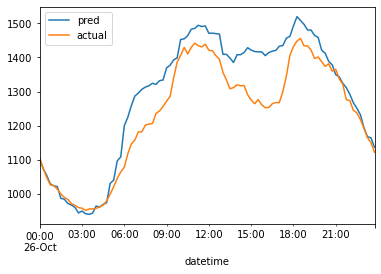

In [740]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


# 4

In [744]:
train1=df.iloc[:69984-96*2,:].set_index('datetime')
val1=df.iloc[69984-96*2:69984,:].set_index('datetime')
test1=df.iloc[69984:69984+96*2,:].set_index('datetime')
train1.dropna(inplace=True)

train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

train1=time_features(train1)

lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)

val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))


day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date()

0.12216930118626079


<AxesSubplot:xlabel='datetime'>

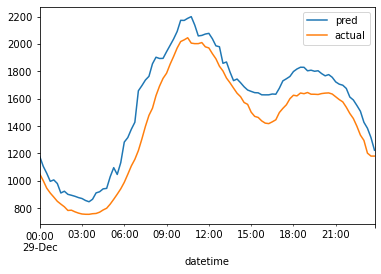

In [745]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


0.10171742151536982


<AxesSubplot:xlabel='datetime'>

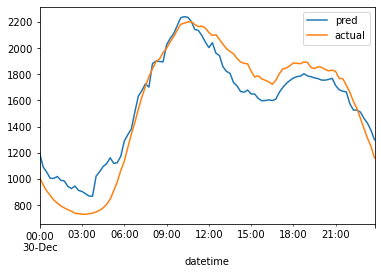

In [746]:
day2.dropna(inplace=True)
X2=day2.drop('shifted_load_2day',axis=1)[list(set(dict_2_k))[:25]]
y1=day1.shifted_load_1day
y2=day2.shifted_load_2day
model2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model2.fit(X2,y2)
val_pred_input2=val_pred_input[X2.columns]
day_2_pred=model2.predict(val_pred_input2)
print(mean_absolute_percentage_error(np.array(val1.load[96:192]), day_2_pred))
pd.concat([pd.DataFrame(day_2_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96:192]),columns=['actual'])],axis=1).set_index(val1.index[96:192]).plot()


In [756]:
288/96

3.0

In [759]:
4+4+1+2

11

In [776]:
null_day_df[null_day_df.load.isna()].iloc[96*15:96*17] 

datetime  load  consec_count
103392 2020-12-13 00:00:00   NaN             1
103393 2020-12-13 00:15:00   NaN             1
103394 2020-12-13 00:30:00   NaN             1
103395 2020-12-13 00:45:00   NaN             1
103396 2020-12-13 01:00:00   NaN             1
...                    ...   ...           ...
103579 2020-12-14 22:45:00   NaN             2
103580 2020-12-14 23:00:00   NaN             2
103581 2020-12-14 23:15:00   NaN             2
103582 2020-12-14 23:30:00   NaN             2
103583 2020-12-14 23:45:00   NaN             2

[192 rows x 3 columns]

# 5

In [761]:
train1=df.iloc[:77856-96,:].set_index('datetime')
val1=df.iloc[77856-96:77856,:].set_index('datetime')
test1=df.iloc[77856:77856+96,:].set_index('datetime')
train1.dropna(inplace=True)

train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

train1=time_features(train1)

lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)

val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))


day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date()

0.04632895408425913


<AxesSubplot:xlabel='datetime'>

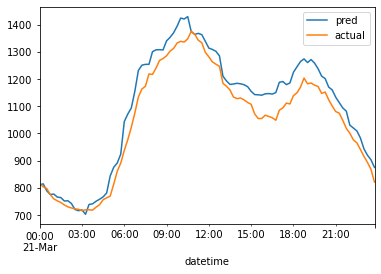

In [762]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


# 6

In [763]:
4+4+1+2+1

12

In [765]:
train1=df.iloc[:96768-96*3,:].set_index('datetime')
val1=df.iloc[96768-96*3:96768,:].set_index('datetime')
test1=df.iloc[96768:96768+96*3,:].set_index('datetime')
train1.dropna(inplace=True)

train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

train1=time_features(train1)

lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)

val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))


day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date()

0.10144726014379273


<AxesSubplot:xlabel='datetime'>

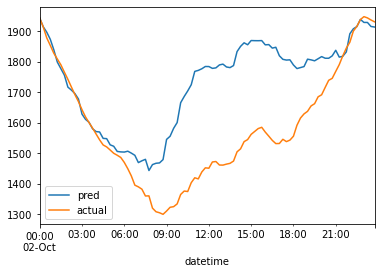

In [766]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


0.04673736566603487


<AxesSubplot:xlabel='datetime'>

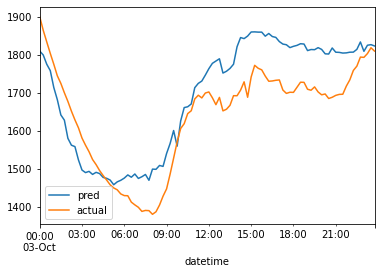

In [767]:
day2.dropna(inplace=True)
X2=day2.drop('shifted_load_2day',axis=1)[list(set(dict_2_k))[:25]]
y1=day1.shifted_load_1day
y2=day2.shifted_load_2day
model2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model2.fit(X2,y2)
val_pred_input2=val_pred_input[X2.columns]
day_2_pred=model2.predict(val_pred_input2)
print(mean_absolute_percentage_error(np.array(val1.load[96:192]), day_2_pred))
pd.concat([pd.DataFrame(day_2_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96:192]),columns=['actual'])],axis=1).set_index(val1.index[96:192]).plot()


0.13898993693095843


<AxesSubplot:xlabel='datetime'>

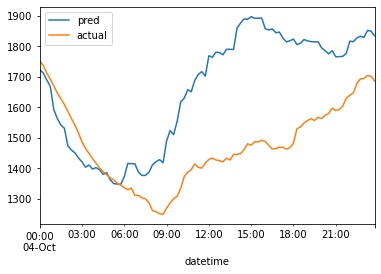

In [768]:
day3.dropna(inplace=True)
X3=day3.drop('shifted_load_3day',axis=1)[list(set(dict_3_k))[:20]]
y3=day3.shifted_load_3day
model3 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model3.fit(X3,y3)
val_pred_input3=val_pred_input[X3.columns]
day_3_pred=model3.predict(val_pred_input3)
print(mean_absolute_percentage_error(np.array(val1.load[192:96*3]), day_3_pred))
pd.concat([pd.DataFrame(day_3_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[192:96*3]),columns=['actual'])],axis=1).set_index(val1.index[192:96*3]).plot()


# 7

In [777]:
train1=df.iloc[:103392-96*2,:].set_index('datetime')
val1=df.iloc[103392-96*2:103392,:].set_index('datetime')
test1=df.iloc[103392:103392+96*2,:].set_index('datetime')
train1.dropna(inplace=True)

train1['shifted_load_1day']=train1.load.shift(-96)
train1['shifted_load_2day']=train1.load.shift(-192)
train1['shifted_load_3day']=train1.load.shift(-288)
train1['shifted_load_4day']=train1.load.shift(-384)

train1=time_features(train1)

lag_features_1(train1,4),lag_features_1(train1,6),lag_features_1(train1,8),lag_features_1(train1,12)
lag_features_1(train1,32),lag_features_1(train1,64),lag_features_1(train1,96),lag_features_1(train1,96+32)
lag_features_1(train1,96+96),lag_features_1(train1,96+96+96),lag_features_1(train1,96+96+96+96)

val_pred_input=train1[train1.shifted_load_1day.isna()]
train1['holiday']=list(train1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val1['holiday']=list(val1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
test1['holiday']=list(test1.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))
val_pred_input['holiday']=list(val_pred_input.reset_index().datetime.apply(lambda x : 1 if x in list(set(dates)) else 0))


day1=train1.drop(['shifted_load_2day','shifted_load_3day','shifted_load_4day'],axis=1)
day2=train1.drop(['shifted_load_1day','shifted_load_3day','shifted_load_4day'],axis=1)
day3=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_4day'],axis=1)
day4=train1.drop(['shifted_load_1day','shifted_load_2day','shifted_load_3day'],axis=1)

C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
C:\Users\Komal\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date()

0.024514506510406778


<AxesSubplot:xlabel='datetime'>

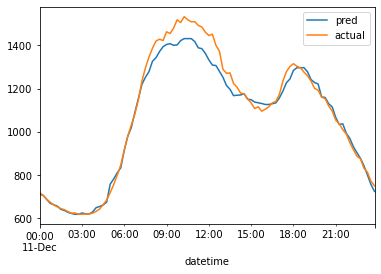

In [778]:
day1.dropna(inplace=True)
X1=day1.drop('shifted_load_1day',axis=1)[list(set(dict_1_k))[:25]]
y1=day1.shifted_load_1day

val_pred_input1=val_pred_input[list(X1.columns)]

model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model1.fit(X1,y1)
day_1_pred=model1.predict(val_pred_input1)

print(mean_absolute_percentage_error(np.array(val1.load[:96]),day_1_pred))
pd.concat([pd.DataFrame(day_1_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[:96]),columns=['actual'])],axis=1).set_index(val1.index[:96]).plot()


0.033952133179541495


<AxesSubplot:xlabel='datetime'>

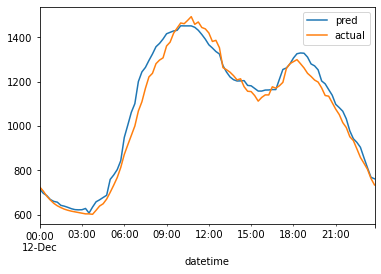

In [779]:
day2.dropna(inplace=True)
X2=day2.drop('shifted_load_2day',axis=1)[list(set(dict_2_k))[:25]]
y1=day1.shifted_load_1day
y2=day2.shifted_load_2day
model2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

model2.fit(X2,y2)
val_pred_input2=val_pred_input[X2.columns]
day_2_pred=model2.predict(val_pred_input2)
print(mean_absolute_percentage_error(np.array(val1.load[96:192]), day_2_pred))
pd.concat([pd.DataFrame(day_2_pred,columns=['pred']),pd.DataFrame(np.array(val1.load[96:192]),columns=['actual'])],axis=1).set_index(val1.index[96:192]).plot()
